In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

v003.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
torch.backends.cudnn.enabled = True
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload
dataset = mre_pinn.data.MREDataset.from_xarrays('../data/NAFLD2')
dataset.eval_baseline()

Loading ../data/NAFLD2/0006/anat.nc
Loading ../data/NAFLD2/0006/wave.nc
Loading ../data/NAFLD2/0006/mre.nc
Loading ../data/NAFLD2/0006/mre_mask.nc
Loading ../data/NAFLD2/0006/anat_mask.nc
Loading ../data/NAFLD2/0020/anat.nc
Loading ../data/NAFLD2/0020/wave.nc
Loading ../data/NAFLD2/0020/mre.nc
Loading ../data/NAFLD2/0020/mre_mask.nc
Loading ../data/NAFLD2/0020/anat_mask.nc
Loading ../data/NAFLD2/0024/anat.nc
Loading ../data/NAFLD2/0024/wave.nc
Loading ../data/NAFLD2/0024/mre.nc
Loading ../data/NAFLD2/0024/mre_mask.nc
Loading ../data/NAFLD2/0024/anat_mask.nc
Loading ../data/NAFLD2/0029/anat.nc
Loading ../data/NAFLD2/0029/wave.nc
Loading ../data/NAFLD2/0029/mre.nc
Loading ../data/NAFLD2/0029/mre_mask.nc
Loading ../data/NAFLD2/0029/anat_mask.nc
Loading ../data/NAFLD2/0043/anat.nc
Loading ../data/NAFLD2/0043/wave.nc
Loading ../data/NAFLD2/0043/mre.nc
Loading ../data/NAFLD2/0043/mre_mask.nc
Loading ../data/NAFLD2/0043/anat_mask.nc
Loading ../data/NAFLD2/0047/anat.nc
Loading ../data/NAFLD2/0

Loading ../data/NAFLD2/0659/mre.nc
Loading ../data/NAFLD2/0659/mre_mask.nc
Loading ../data/NAFLD2/0659/anat_mask.nc
Loading ../data/NAFLD2/0693/anat.nc
Loading ../data/NAFLD2/0693/wave.nc
Loading ../data/NAFLD2/0693/mre.nc
Loading ../data/NAFLD2/0693/mre_mask.nc
Loading ../data/NAFLD2/0693/anat_mask.nc
Loading ../data/NAFLD2/0704/anat.nc
Loading ../data/NAFLD2/0704/wave.nc
Loading ../data/NAFLD2/0704/mre.nc
Loading ../data/NAFLD2/0704/mre_mask.nc
Loading ../data/NAFLD2/0704/anat_mask.nc
Loading ../data/NAFLD2/0717/anat.nc
Loading ../data/NAFLD2/0717/wave.nc
Loading ../data/NAFLD2/0717/mre.nc
Loading ../data/NAFLD2/0717/mre_mask.nc
Loading ../data/NAFLD2/0717/anat_mask.nc
Loading ../data/NAFLD2/0727/anat.nc
Loading ../data/NAFLD2/0727/wave.nc
Loading ../data/NAFLD2/0727/mre.nc
Loading ../data/NAFLD2/0727/mre_mask.nc
Loading ../data/NAFLD2/0727/anat_mask.nc
Loading ../data/NAFLD2/0734/anat.nc
Loading ../data/NAFLD2/0734/wave.nc
Loading ../data/NAFLD2/0734/mre.nc
Loading ../data/NAFLD2/07

Loading ../data/NAFLD2/1230/mre.nc
Loading ../data/NAFLD2/1230/mre_mask.nc
Loading ../data/NAFLD2/1230/anat_mask.nc
Loading ../data/NAFLD2/1261/anat.nc
Loading ../data/NAFLD2/1261/wave.nc
Loading ../data/NAFLD2/1261/mre.nc
Loading ../data/NAFLD2/1261/mre_mask.nc
Loading ../data/NAFLD2/1261/anat_mask.nc
Loading ../data/NAFLD2/1271/anat.nc
Loading ../data/NAFLD2/1271/wave.nc
Loading ../data/NAFLD2/1271/mre.nc
Loading ../data/NAFLD2/1271/mre_mask.nc
Loading ../data/NAFLD2/1271/anat_mask.nc
Loading ../data/NAFLD2/1296/anat.nc
Loading ../data/NAFLD2/1296/wave.nc
Loading ../data/NAFLD2/1296/mre.nc
Loading ../data/NAFLD2/1296/mre_mask.nc
Loading ../data/NAFLD2/1296/anat_mask.nc
Loading ../data/NAFLD2/1303/anat.nc
Loading ../data/NAFLD2/1303/wave.nc
Loading ../data/NAFLD2/1303/mre.nc
Loading ../data/NAFLD2/1303/mre_mask.nc
Loading ../data/NAFLD2/1303/anat_mask.nc
Loading ../data/NAFLD2/1311/anat.nc
Loading ../data/NAFLD2/1311/wave.nc
Loading ../data/NAFLD2/1311/mre.nc
Loading ../data/NAFLD2/13

Loading ../data/NAFLD2/1806/mre.nc
Loading ../data/NAFLD2/1806/mre_mask.nc
Loading ../data/NAFLD2/1806/anat_mask.nc
Loading ../data/NAFLD2/1807/anat.nc
Loading ../data/NAFLD2/1807/wave.nc
Loading ../data/NAFLD2/1807/mre.nc
Loading ../data/NAFLD2/1807/mre_mask.nc
Loading ../data/NAFLD2/1807/anat_mask.nc
Loading ../data/NAFLD2/1819/anat.nc
Loading ../data/NAFLD2/1819/wave.nc
Loading ../data/NAFLD2/1819/mre.nc
Loading ../data/NAFLD2/1819/mre_mask.nc
Loading ../data/NAFLD2/1819/anat_mask.nc
Loading ../data/NAFLD2/1829/anat.nc
Loading ../data/NAFLD2/1829/wave.nc
Loading ../data/NAFLD2/1829/mre.nc
Loading ../data/NAFLD2/1829/mre_mask.nc
Loading ../data/NAFLD2/1829/anat_mask.nc
Loading ../data/NAFLD2/1839/anat.nc
Loading ../data/NAFLD2/1839/wave.nc
Loading ../data/NAFLD2/1839/mre.nc
Loading ../data/NAFLD2/1839/mre_mask.nc
Loading ../data/NAFLD2/1839/anat_mask.nc
Loading ../data/NAFLD2/1843/anat.nc
Loading ../data/NAFLD2/1843/wave.nc
Loading ../data/NAFLD2/1843/mre.nc
Loading ../data/NAFLD2/18

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data

  return key in self.data



In [4]:
%autoreload
# split into train and test sets
dataset.shuffle(seed=0)
train_set = dataset[:-15]
test_set  = dataset[-15:]
len(train_set), len(test_set)

(140, 15)

In [5]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', rho=1e3, omega=60, detach=True)
pde

In [6]:
%autoreload

pino = mre_pinn.model.pino.HyperCNN(
    n_channels_in=1,
    n_channels_block=16,
    n_conv_per_block=2,
    n_conv_blocks=5,
    width_factor=2,
    activ_fn='g',
    n_latent=128,
    n_pinn_layers=4,
    n_pinn_hidden=128,
    u_omega=16,
    u_scale=1e2,
    u_loc=0,
    mu_omega=16,
    mu_scale=1e3,
    mu_loc=0,
    skip_connect=True,
    dense=True,
    parallel=False
)
pino

HyperCNN(
  (u_cnn): CNN(
    (conv_in): Conv3d(1, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (conv_block0): ConvBlock(
      (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool0): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block1): ConvBlock(
      (conv0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool1): AvgPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0)
    (conv_block2): ConvBlock(
      (conv0): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (conv1): Conv3d(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (pool2): AvgPool3d(kernel_size=(2, 2, 1), stride=(2, 2, 1), padding=0)
    (conv_block3): ConvBlock(
 

In [7]:
%autoreload

model = mre_pinn.training.PINOModel(
    train_set, test_set, pino, pde,
    loss_weights=[1e-2, 0, 0],
    batch_size=1,
    n_points=4096,
    pde_warmup_iters=50000,
    pde_step_iters=10000,
)
model.compile(
    optimizer='adam',
    lr=1e-5,
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=100, interact=True)

Compiling model...
'compile' took 0.000365 s



In [ ]:
%%time
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False
model.benchmark(100)

Training model...



  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Step      Train loss                        Test loss                         Test metric
0         [2.21e+03, 0.00e+00, 0.00e+00]    [2.34e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



<IPython.core.display.Javascript object>


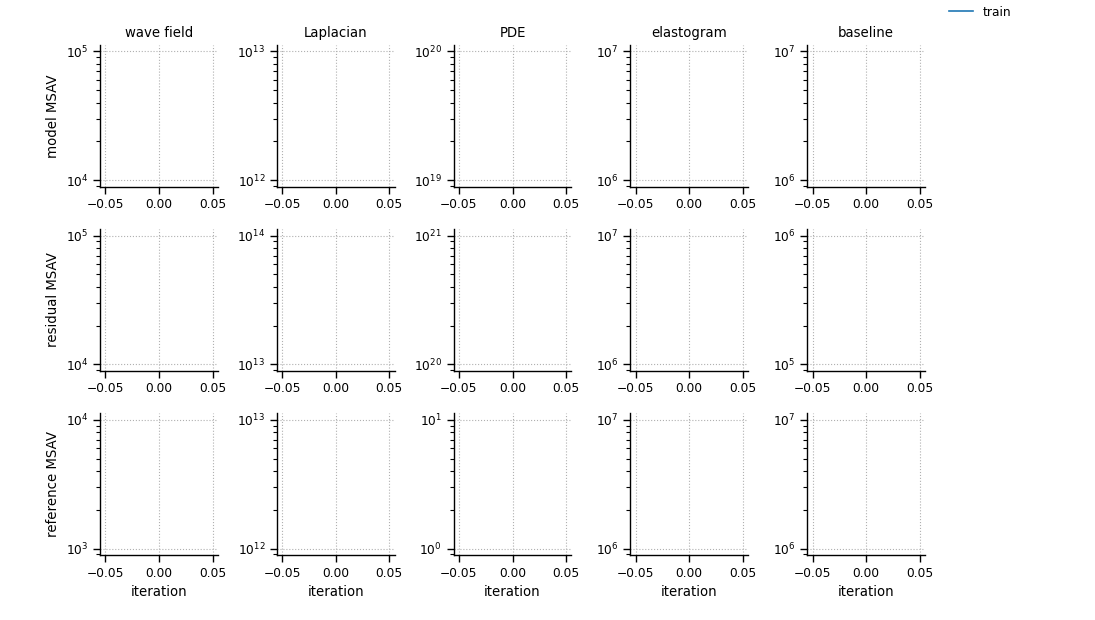

<IPython.core.display.Javascript object>


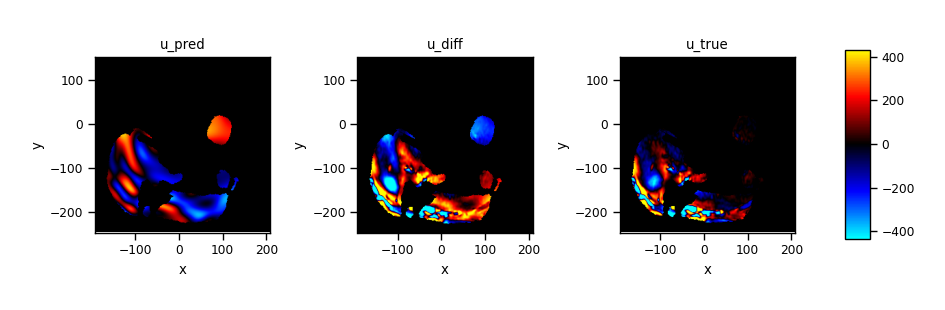

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


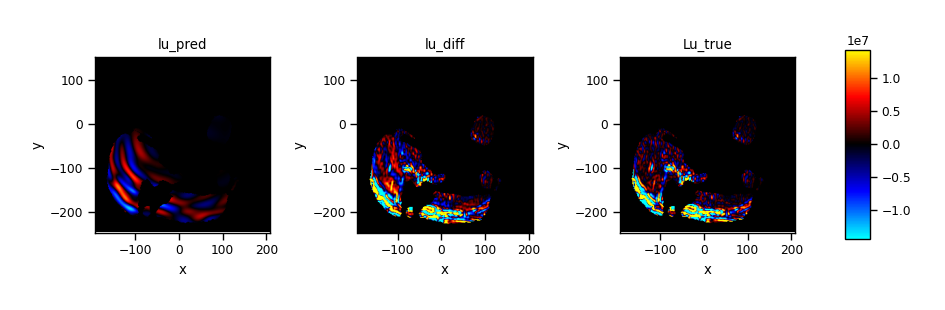

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


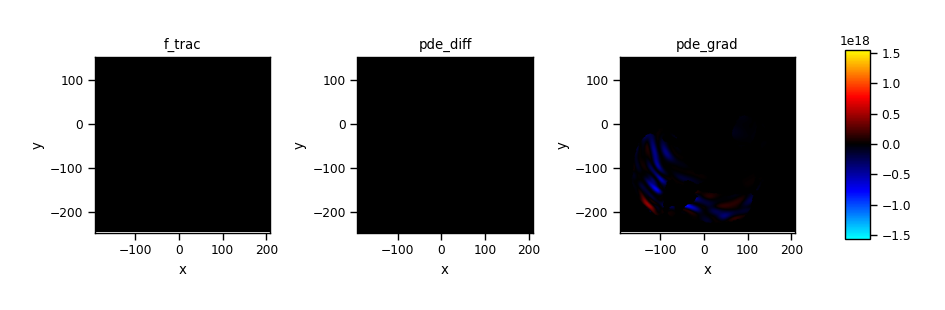

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


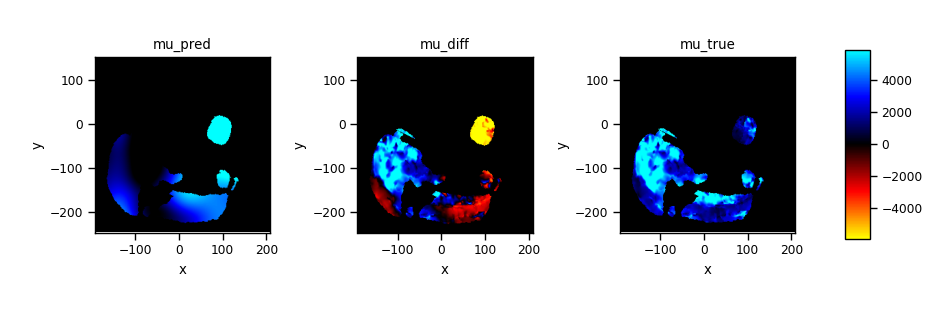

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


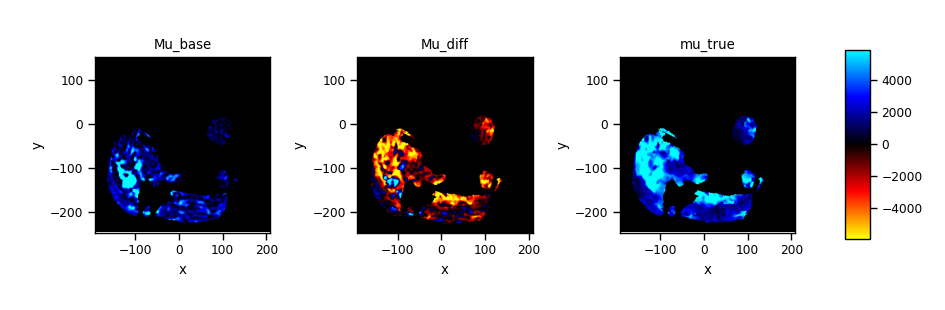

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4255 (0.71%)
10        [2.26e+03, 0.00e+00, 0.00e+00]    [2.94e+03, 0.00e+00, 0.00e+00]    []  
20        [2.37e+03, 0.00e+00, 0.00e+00]    [3.15e+03, 0.00e+00, 0.00e+00]    []  
30        [2.30e+03, 0.00e+00, 0.00e+00]    [3.00e+03, 0.00e+00, 0.00e+00]    []  
40        [3.29e+03, 0.00e+00, 0.00e+00]    [3.96e+03, 0.00e+00, 0.00e+00]    []  
50        [2.08e+03, 0.00e+00, 0.00e+00]    [2.84e+03, 0.00e+00, 0.00e+00]    []  
60        [2.77e+03, 0.00e+00, 0.00e+00]    [3.01e+03, 0.00e+00, 0.00e+00]    []  
70        [2.40e+03, 0.00e+00, 0.00e+00]    [3.04e+03, 0.00e+00, 0.00e+00]    []  
80        [2.54e+03, 0.00e+00, 0.00e+00]    [3.16e+03, 0.00e+00, 0.00e+00]    []  
90        [2.82e+03, 0.00e+00, 0.00e+00]    [2.92e+03, 0.00e+00, 0.00e+00]    []  
100       [2.59e+03, 0.00e+00, 0.00e+00]    [2.72e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



<IPython.core.display.Javascript object>


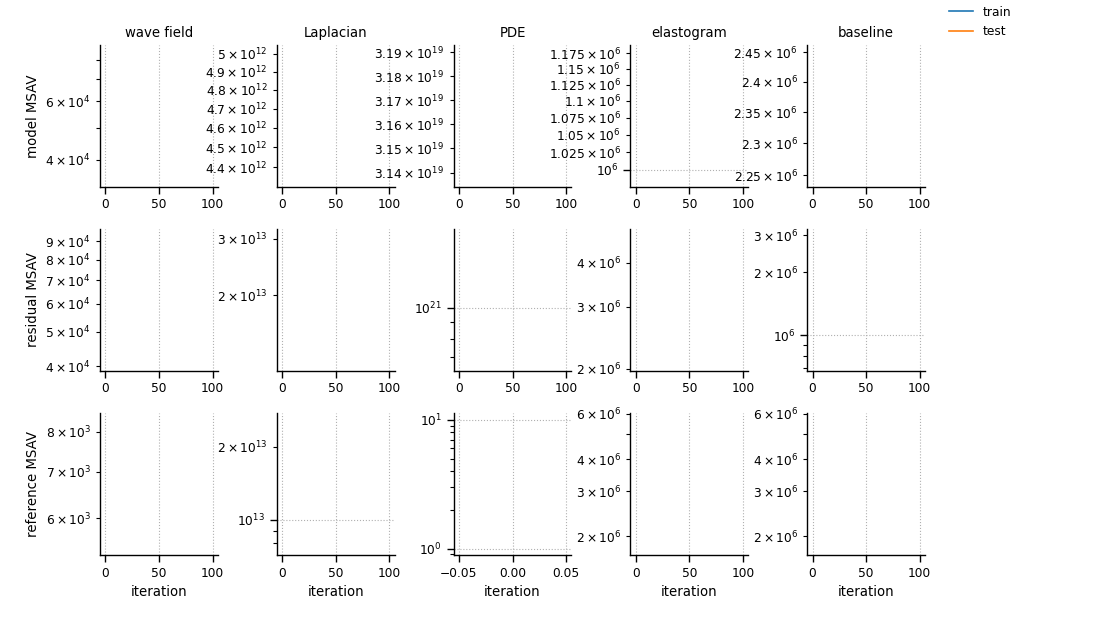

Time spent testing: 13.0900 (1.30%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



110       [2.47e+03, 0.00e+00, 0.00e+00]    [2.80e+03, 0.00e+00, 0.00e+00]    []  
120       [1.91e+03, 0.00e+00, 0.00e+00]    [2.73e+03, 0.00e+00, 0.00e+00]    []  
130       [2.13e+03, 0.00e+00, 0.00e+00]    [2.69e+03, 0.00e+00, 0.00e+00]    []  
140       [2.26e+03, 0.00e+00, 0.00e+00]    [2.72e+03, 0.00e+00, 0.00e+00]    []  
150       [2.38e+03, 0.00e+00, 0.00e+00]    [2.33e+03, 0.00e+00, 0.00e+00]    []  
160       [1.78e+03, 0.00e+00, 0.00e+00]    [2.49e+03, 0.00e+00, 0.00e+00]    []  
170       [2.30e+03, 0.00e+00, 0.00e+00]    [2.46e+03, 0.00e+00, 0.00e+00]    []  
180       [2.02e+03, 0.00e+00, 0.00e+00]    [2.13e+03, 0.00e+00, 0.00e+00]    []  
190       [1.06e+03, 0.00e+00, 0.00e+00]    [2.42e+03, 0.00e+00, 0.00e+00]    []  
200       [9.12e+02, 0.00e+00, 0.00e+00]    [2.79e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



<IPython.core.display.Javascript object>


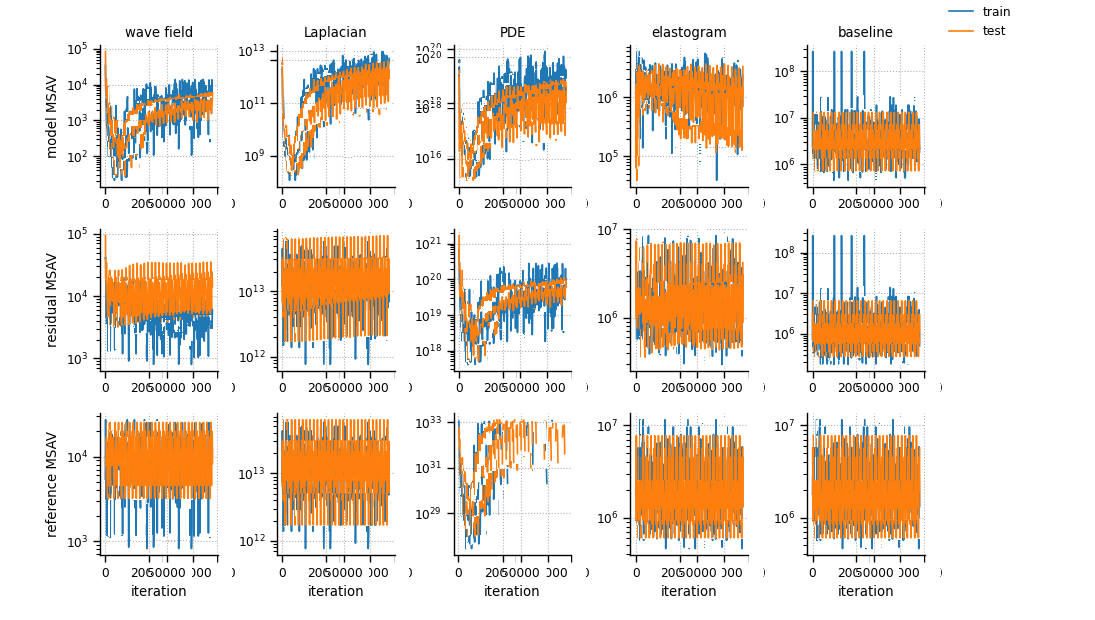

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1462 (1.87%)
210       [1.60e+03, 0.00e+00, 0.00e+00]    [2.66e+03, 0.00e+00, 0.00e+00]    []  
220       [2.46e+03, 0.00e+00, 0.00e+00]    [2.18e+03, 0.00e+00, 0.00e+00]    []  
230       [1.45e+03, 0.00e+00, 0.00e+00]    [2.10e+03, 0.00e+00, 0.00e+00]    []  
240       [1.58e+03, 0.00e+00, 0.00e+00]    [2.11e+03, 0.00e+00, 0.00e+00]    []  
250       [1.93e+03, 0.00e+00, 0.00e+00]    [1.90e+03, 0.00e+00, 0.00e+00]    []  
260       [1.41e+03, 0.00e+00, 0.00e+00]    [1.79e+03, 0.00e+00, 0.00e+00]    []  
270       [1.41e+03, 0.00e+00, 0.00e+00]    [1.72e+03, 0.00e+00, 0.00e+00]    []  
280       [1.34e+03, 0.00e+00, 0.00e+00]    [1.77e+03, 0.00e+00, 0.00e+00]    []  
290       [1.66e+03, 0.00e+00, 0.00e+00]    [1.67e+03, 0.00e+00, 0.00e+00]    []  
300       [1.21e+03, 0.00e+00, 0.00e+00]    [1.64e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5112 (2.41%)
310       [1.36e+03, 0.00e+00, 0.00e+00]    [1.73e+03, 0.00e+00, 0.00e+00]    []  
320       [1.54e+03, 0.00e+00, 0.00e+00]    [1.89e+03, 0.00e+00, 0.00e+00]    []  
330       [1.30e+03, 0.00e+00, 0.00e+00]    [1.97e+03, 0.00e+00, 0.00e+00]    []  
340       [1.21e+03, 0.00e+00, 0.00e+00]    [1.92e+03, 0.00e+00, 0.00e+00]    []  
350       [9.01e+02, 0.00e+00, 0.00e+00]    [1.97e+03, 0.00e+00, 0.00e+00]    []  
360       [1.74e+03, 0.00e+00, 0.00e+00]    [2.06e+03, 0.00e+00, 0.00e+00]    []  
370       [1.72e+03, 0.00e+00, 0.00e+00]    [1.96e+03, 0.00e+00, 0.00e+00]    []  
380       [1.25e+03, 0.00e+00, 0.00e+00]    [1.85e+03, 0.00e+00, 0.00e+00]    []  
390       [1.24e+03, 0.00e+00, 0.00e+00]    [1.83e+03, 0.00e+00, 0.00e+00]    []  
400       [1.39e+03, 0.00e+00, 0.00e+00]    [1.78e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6188 (2.94%)
410       [1.90e+03, 0.00e+00, 0.00e+00]    [1.63e+03, 0.00e+00, 0.00e+00]    []  
420       [1.40e+03, 0.00e+00, 0.00e+00]    [1.72e+03, 0.00e+00, 0.00e+00]    []  
430       [1.39e+03, 0.00e+00, 0.00e+00]    [1.69e+03, 0.00e+00, 0.00e+00]    []  
440       [1.02e+03, 0.00e+00, 0.00e+00]    [1.65e+03, 0.00e+00, 0.00e+00]    []  
450       [1.24e+03, 0.00e+00, 0.00e+00]    [1.63e+03, 0.00e+00, 0.00e+00]    []  
460       [9.58e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
470       [1.35e+03, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
480       [7.92e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
490       [9.31e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
500       [1.04e+03, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0564 (3.49%)
510       [1.10e+03, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
520       [1.13e+03, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
530       [9.30e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
540       [9.04e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
550       [9.77e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
560       [7.89e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
570       [1.19e+03, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
580       [1.19e+03, 0.00e+00, 0.00e+00]    [1.43e+03, 0.00e+00, 0.00e+00]    []  
590       [1.23e+03, 0.00e+00, 0.00e+00]    [1.41e+03, 0.00e+00, 0.00e+00]    []  
600       [7.16e+02, 0.00e+00, 0.00e+00]    [1.45e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5927 (3.99%)
610       [6.47e+02, 0.00e+00, 0.00e+00]    [1.44e+03, 0.00e+00, 0.00e+00]    []  
620       [9.36e+02, 0.00e+00, 0.00e+00]    [1.41e+03, 0.00e+00, 0.00e+00]    []  
630       [1.16e+03, 0.00e+00, 0.00e+00]    [1.43e+03, 0.00e+00, 0.00e+00]    []  
640       [7.75e+02, 0.00e+00, 0.00e+00]    [1.43e+03, 0.00e+00, 0.00e+00]    []  
650       [6.38e+02, 0.00e+00, 0.00e+00]    [1.43e+03, 0.00e+00, 0.00e+00]    []  
660       [6.92e+02, 0.00e+00, 0.00e+00]    [1.46e+03, 0.00e+00, 0.00e+00]    []  
670       [6.17e+02, 0.00e+00, 0.00e+00]    [1.46e+03, 0.00e+00, 0.00e+00]    []  
680       [9.23e+02, 0.00e+00, 0.00e+00]    [1.42e+03, 0.00e+00, 0.00e+00]    []  
690       [7.18e+02, 0.00e+00, 0.00e+00]    [1.41e+03, 0.00e+00, 0.00e+00]    []  
700       [1.28e+03, 0.00e+00, 0.00e+00]    [1.39e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5884 (4.49%)
710       [7.21e+02, 0.00e+00, 0.00e+00]    [1.37e+03, 0.00e+00, 0.00e+00]    []  
720       [7.72e+02, 0.00e+00, 0.00e+00]    [1.40e+03, 0.00e+00, 0.00e+00]    []  
730       [9.06e+02, 0.00e+00, 0.00e+00]    [1.43e+03, 0.00e+00, 0.00e+00]    []  
740       [1.09e+03, 0.00e+00, 0.00e+00]    [1.40e+03, 0.00e+00, 0.00e+00]    []  
750       [9.92e+02, 0.00e+00, 0.00e+00]    [1.40e+03, 0.00e+00, 0.00e+00]    []  
760       [9.57e+02, 0.00e+00, 0.00e+00]    [1.39e+03, 0.00e+00, 0.00e+00]    []  
770       [8.44e+02, 0.00e+00, 0.00e+00]    [1.37e+03, 0.00e+00, 0.00e+00]    []  
780       [6.58e+02, 0.00e+00, 0.00e+00]    [1.41e+03, 0.00e+00, 0.00e+00]    []  
790       [8.87e+02, 0.00e+00, 0.00e+00]    [1.42e+03, 0.00e+00, 0.00e+00]    []  
800       [9.70e+02, 0.00e+00, 0.00e+00]    [1.39e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4453 (4.98%)
810       [7.25e+02, 0.00e+00, 0.00e+00]    [1.39e+03, 0.00e+00, 0.00e+00]    []  
820       [7.95e+02, 0.00e+00, 0.00e+00]    [1.44e+03, 0.00e+00, 0.00e+00]    []  
830       [9.85e+02, 0.00e+00, 0.00e+00]    [1.42e+03, 0.00e+00, 0.00e+00]    []  
840       [5.33e+02, 0.00e+00, 0.00e+00]    [1.37e+03, 0.00e+00, 0.00e+00]    []  
850       [6.33e+02, 0.00e+00, 0.00e+00]    [1.37e+03, 0.00e+00, 0.00e+00]    []  
860       [5.12e+02, 0.00e+00, 0.00e+00]    [1.39e+03, 0.00e+00, 0.00e+00]    []  
870       [7.76e+02, 0.00e+00, 0.00e+00]    [1.44e+03, 0.00e+00, 0.00e+00]    []  
880       [1.06e+03, 0.00e+00, 0.00e+00]    [1.44e+03, 0.00e+00, 0.00e+00]    []  
890       [1.17e+03, 0.00e+00, 0.00e+00]    [1.40e+03, 0.00e+00, 0.00e+00]    []  
900       [1.27e+03, 0.00e+00, 0.00e+00]    [1.39e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5924 (5.46%)
910       [5.98e+02, 0.00e+00, 0.00e+00]    [1.36e+03, 0.00e+00, 0.00e+00]    []  
920       [5.44e+02, 0.00e+00, 0.00e+00]    [1.37e+03, 0.00e+00, 0.00e+00]    []  
930       [9.43e+02, 0.00e+00, 0.00e+00]    [1.37e+03, 0.00e+00, 0.00e+00]    []  
940       [7.07e+02, 0.00e+00, 0.00e+00]    [1.35e+03, 0.00e+00, 0.00e+00]    []  
950       [1.08e+03, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
960       [6.46e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
970       [6.36e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
980       [8.21e+02, 0.00e+00, 0.00e+00]    [1.35e+03, 0.00e+00, 0.00e+00]    []  
990       [1.06e+03, 0.00e+00, 0.00e+00]    [1.35e+03, 0.00e+00, 0.00e+00]    []  
1000      [1.25e+03, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8732 (5.94%)
1010      [1.08e+03, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
1020      [6.43e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1030      [1.14e+03, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
1040      [6.65e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
1050      [9.74e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
1060      [7.30e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
1070      [3.99e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
1080      [6.55e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1090      [6.18e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1100      [1.99e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5811 (6.41%)
1110      [7.02e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1120      [6.59e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1130      [4.42e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
1140      [8.29e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
1150      [6.19e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
1160      [1.13e+03, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
1170      [5.43e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1180      [1.16e+03, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
1190      [4.52e+02, 0.00e+00, 0.00e+00]    [1.38e+03, 0.00e+00, 0.00e+00]    []  
1200      [5.36e+02, 0.00e+00, 0.00e+00]    [1.37e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4817 (6.86%)
1210      [1.17e+03, 0.00e+00, 0.00e+00]    [1.35e+03, 0.00e+00, 0.00e+00]    []  
1220      [8.14e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
1230      [7.84e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1240      [9.58e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
1250      [9.56e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1260      [2.68e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1270      [7.72e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1280      [1.02e+03, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
1290      [8.79e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
1300      [1.11e+03, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6731 (7.31%)
1310      [4.99e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1320      [1.26e+03, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1330      [8.30e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1340      [9.83e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1350      [1.18e+03, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1360      [5.74e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1370      [9.14e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1380      [4.72e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1390      [3.62e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1400      [1.04e+03, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8550 (7.76%)
1410      [4.98e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1420      [8.72e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1430      [3.63e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
1440      [5.96e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
1450      [8.37e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1460      [5.03e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1470      [1.02e+03, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1480      [1.09e+03, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1490      [2.12e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1500      [7.98e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4187 (8.18%)
1510      [4.97e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1520      [5.87e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1530      [2.19e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1540      [6.04e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1550      [6.97e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1560      [1.69e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1570      [1.07e+03, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1580      [8.95e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1590      [1.01e+03, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1600      [2.18e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5177 (8.60%)
1610      [7.77e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1620      [8.17e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1630      [8.38e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1640      [6.87e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1650      [1.06e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1660      [9.86e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1670      [6.26e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1680      [9.72e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1690      [6.29e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1700      [6.61e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7113 (9.02%)
1710      [6.80e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1720      [1.18e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1730      [7.80e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1740      [8.28e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1750      [5.46e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1760      [7.20e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1770      [7.69e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
1780      [9.02e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1790      [9.53e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1800      [9.86e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.2727 (9.42%)
1810      [3.80e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1820      [7.98e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1830      [3.38e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1840      [6.53e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
1850      [1.24e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1860      [6.50e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1870      [5.52e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
1880      [7.34e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1890      [1.05e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
1900      [6.79e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8436 (9.83%)
1910      [7.82e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1920      [8.64e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1930      [5.12e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
1940      [9.78e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
1950      [5.24e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
1960      [8.57e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
1970      [6.53e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
1980      [6.91e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
1990      [9.55e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2000      [7.15e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5406 (10.22%)
2010      [1.17e+03, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2020      [9.32e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
2030      [6.42e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2040      [1.40e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2050      [1.17e+03, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2060      [1.10e+03, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2070      [6.88e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2080      [8.13e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2090      [5.96e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2100      [1.14e+03, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4880 (10.61%)
2110      [8.28e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2120      [8.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2130      [1.06e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2140      [6.60e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2150      [1.23e+03, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2160      [6.80e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2170      [1.90e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2180      [6.30e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
2190      [5.79e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2200      [5.12e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5468 (10.99%)
2210      [1.00e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2220      [1.05e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2230      [9.94e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2240      [5.17e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2250      [5.45e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2260      [6.04e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2270      [8.28e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
2280      [6.41e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2290      [3.88e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2300      [9.54e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8120 (11.37%)
2310      [6.44e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2320      [5.46e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2330      [5.69e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2340      [8.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2350      [4.40e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2360      [6.56e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2370      [1.05e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2380      [6.52e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2390      [1.04e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2400      [6.12e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7590 (11.74%)
2410      [3.62e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2420      [4.51e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2430      [5.63e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2440      [4.72e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
2450      [9.27e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2460      [9.59e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
2470      [7.01e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2480      [5.92e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2490      [7.44e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2500      [6.38e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7442 (12.11%)
2510      [1.07e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2520      [9.36e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2530      [4.91e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2540      [7.05e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2550      [5.19e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2560      [1.06e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2570      [5.60e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2580      [4.10e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2590      [5.63e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2600      [9.90e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7404 (12.47%)
2610      [6.36e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2620      [9.88e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2630      [6.50e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2640      [7.83e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2650      [8.94e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
2660      [4.72e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
2670      [6.00e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
2680      [6.23e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2690      [1.08e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2700      [7.77e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8377 (12.83%)
2710      [4.71e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2720      [1.04e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2730      [3.32e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2740      [7.52e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2750      [3.97e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2760      [1.99e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2770      [4.05e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
2780      [1.24e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2790      [5.41e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2800      [7.15e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.4821 (13.17%)
2810      [5.95e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2820      [5.22e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2830      [4.58e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2840      [6.59e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
2850      [5.32e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
2860      [5.86e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
2870      [7.33e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2880      [9.39e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
2890      [3.08e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
2900      [1.03e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8074 (13.52%)
2910      [4.40e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
2920      [6.73e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
2930      [4.23e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
2940      [5.15e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
2950      [6.13e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
2960      [7.09e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
2970      [9.87e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2980      [3.53e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
2990      [4.88e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
3000      [8.58e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0092 (13.86%)
3010      [4.05e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3020      [4.74e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3030      [5.70e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3040      [1.20e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
3050      [7.44e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3060      [1.10e+03, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3070      [2.06e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3080      [6.95e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3090      [1.61e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3100      [4.97e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5624 (14.19%)
3110      [9.69e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3120      [4.45e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3130      [8.73e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
3140      [7.03e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3150      [7.69e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3160      [6.59e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3170      [4.98e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3180      [5.53e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3190      [1.05e+03, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3200      [7.50e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6803 (14.52%)
3210      [5.36e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3220      [6.81e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3230      [4.25e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3240      [5.35e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3250      [6.26e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3260      [5.64e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3270      [5.60e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3280      [9.48e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3290      [6.69e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3300      [8.11e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5835 (14.84%)
3310      [6.17e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3320      [6.46e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3330      [6.85e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3340      [1.02e+03, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3350      [6.14e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3360      [8.20e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3370      [8.31e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3380      [8.56e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3390      [5.51e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
3400      [4.49e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5814 (15.15%)
3410      [6.90e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3420      [6.01e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3430      [1.20e+03, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3440      [9.60e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3450      [8.04e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3460      [9.32e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3470      [1.48e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3480      [4.51e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
3490      [6.31e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3500      [1.02e+03, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8761 (15.46%)
3510      [4.43e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3520      [6.70e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3530      [2.69e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
3540      [9.48e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
3550      [4.34e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3560      [8.06e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
3570      [7.27e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3580      [8.98e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3590      [5.13e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3600      [7.09e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6686 (15.77%)
3610      [1.12e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3620      [6.39e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3630      [2.42e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3640      [3.62e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3650      [7.62e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3660      [8.31e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3670      [6.97e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3680      [4.68e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3690      [1.04e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3700      [1.26e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6960 (16.07%)
3710      [1.27e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3720      [7.33e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3730      [7.38e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3740      [9.94e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3750      [1.13e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3760      [6.94e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3770      [1.22e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3780      [7.81e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3790      [5.73e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3800      [1.06e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5581 (16.37%)
3810      [5.10e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
3820      [8.18e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3830      [1.05e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3840      [5.21e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3850      [8.00e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3860      [4.80e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3870      [9.59e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3880      [1.14e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3890      [6.83e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3900      [1.03e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8401 (16.66%)
3910      [6.83e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3920      [5.45e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3930      [1.12e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3940      [6.81e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3950      [3.63e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3960      [4.92e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3970      [5.34e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
3980      [4.39e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
3990      [1.05e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4000      [1.06e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.6959 (16.95%)
4010      [4.14e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4020      [6.80e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4030      [4.36e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4040      [1.23e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4050      [4.05e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4060      [5.07e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4070      [1.03e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4080      [7.75e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4090      [5.33e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4100      [6.13e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0635 (17.24%)
4110      [6.44e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4120      [5.35e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4130      [5.86e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4140      [8.06e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4150      [6.22e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4160      [8.23e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4170      [7.34e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4180      [6.07e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4190      [5.32e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4200      [1.04e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8855 (17.53%)
4210      [7.61e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4220      [6.98e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4230      [7.17e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4240      [1.09e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4250      [3.91e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4260      [1.24e+03, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4270      [6.10e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4280      [4.41e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4290      [8.36e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4300      [8.17e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8613 (17.81%)
4310      [9.11e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4320      [2.06e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4330      [7.55e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4340      [1.11e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4350      [7.06e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4360      [3.18e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4370      [5.21e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4380      [5.05e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4390      [4.68e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4400      [8.39e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9608 (18.09%)
4410      [5.36e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4420      [1.07e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4430      [6.25e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
4440      [9.73e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4450      [6.21e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
4460      [7.92e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4470      [4.86e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4480      [3.50e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4490      [9.79e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4500      [7.16e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9145 (18.36%)
4510      [6.82e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4520      [9.54e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4530      [1.92e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4540      [6.20e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4550      [6.47e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4560      [7.31e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4570      [6.50e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4580      [9.03e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4590      [8.21e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4600      [1.08e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9756 (18.63%)
4610      [5.96e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4620      [7.79e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4630      [6.83e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4640      [6.58e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4650      [7.64e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4660      [6.60e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4670      [4.55e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4680      [4.75e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4690      [6.19e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4700      [7.93e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0280 (18.90%)
4710      [1.01e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4720      [1.00e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
4730      [1.04e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4740      [7.88e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
4750      [1.06e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4760      [6.59e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4770      [5.23e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4780      [5.29e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4790      [1.08e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
4800      [9.50e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7394 (19.16%)
4810      [8.55e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
4820      [9.90e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4830      [9.44e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
4840      [7.79e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
4850      [6.85e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4860      [4.64e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
4870      [9.17e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
4880      [4.06e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4890      [6.89e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4900      [8.18e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8036 (19.42%)
4910      [1.21e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
4920      [4.85e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4930      [7.32e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4940      [7.66e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
4950      [5.60e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
4960      [6.43e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
4970      [3.65e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
4980      [7.15e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
4990      [1.92e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
5000      [7.84e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8841 (19.67%)
5010      [3.21e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5020      [8.42e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
5030      [4.48e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5040      [1.05e+03, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
5050      [8.17e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5060      [4.36e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
5070      [3.84e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
5080      [3.86e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5090      [1.03e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5100      [1.25e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.5428 (19.91%)
5110      [1.09e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5120      [5.15e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
5130      [7.78e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5140      [8.96e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5150      [5.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5160      [8.21e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5170      [5.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5180      [8.57e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5190      [7.17e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5200      [6.73e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9122 (20.16%)
5210      [7.97e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5220      [5.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5230      [6.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5240      [1.24e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5250      [6.73e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5260      [5.39e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5270      [4.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5280      [7.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5290      [6.26e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5300      [5.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4589 (20.42%)
5310      [5.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5320      [5.73e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5330      [3.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5340      [5.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5350      [8.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5360      [1.90e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5370      [7.59e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5380      [7.70e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5390      [1.14e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5400      [6.27e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7415 (20.65%)
5410      [7.01e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5420      [5.48e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5430      [9.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5440      [5.30e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5450      [4.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5460      [5.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5470      [1.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5480      [6.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5490      [5.17e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5500      [6.30e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1479 (20.90%)
5510      [6.81e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5520      [6.15e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5530      [5.17e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5540      [5.80e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5550      [5.44e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5560      [2.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5570      [5.69e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5580      [5.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5590      [6.43e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5600      [5.31e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8374 (21.13%)
5610      [7.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5620      [1.12e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5630      [4.51e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5640      [5.38e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5650      [5.32e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5660      [9.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5670      [7.10e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5680      [4.76e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5690      [6.03e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5700      [6.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1203 (21.37%)
5710      [9.18e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5720      [6.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5730      [8.07e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5740      [7.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5750      [8.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5760      [7.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5770      [5.48e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5780      [9.70e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5790      [7.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5800      [4.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8542 (21.60%)
5810      [1.00e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5820      [6.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5830      [8.43e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5840      [7.33e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5850      [6.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5860      [1.88e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5870      [4.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5880      [7.81e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5890      [5.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5900      [6.22e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1599 (21.82%)
5910      [8.37e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5920      [7.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5930      [4.43e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5940      [9.37e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5950      [5.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5960      [1.77e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5970      [3.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
5980      [8.05e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
5990      [5.61e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6000      [4.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0279 (22.05%)
6010      [6.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6020      [8.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6030      [7.50e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6040      [5.25e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6050      [5.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6060      [1.04e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6070      [6.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6080      [4.04e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6090      [4.84e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6100      [7.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1852 (22.27%)
6110      [8.38e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6120      [4.24e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6130      [4.05e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6140      [5.87e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6150      [6.43e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6160      [7.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6170      [9.07e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6180      [8.07e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6190      [1.66e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6200      [4.43e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0377 (22.49%)
6210      [6.69e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6220      [8.32e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6230      [9.76e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6240      [5.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6250      [5.27e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6260      [4.11e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6270      [6.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6280      [6.26e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6290      [1.11e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6300      [9.84e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1217 (22.71%)
6310      [4.67e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6320      [9.38e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6330      [4.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6340      [5.03e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6350      [6.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6360      [7.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6370      [8.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6380      [1.02e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6390      [9.77e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6400      [6.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2605 (22.93%)
6410      [2.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6420      [6.40e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6430      [7.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6440      [6.66e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6450      [5.60e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6460      [6.02e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6470      [7.30e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6480      [9.29e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6490      [5.51e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6500      [1.01e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1941 (23.14%)
6510      [1.07e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6520      [6.35e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6530      [7.40e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6540      [3.79e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6550      [7.08e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6560      [7.30e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6570      [6.40e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6580      [5.21e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6590      [7.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6600      [7.31e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8476 (23.37%)
6610      [7.78e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6620      [5.61e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6630      [9.81e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6640      [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6650      [8.59e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6660      [3.64e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6670      [5.33e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6680      [4.07e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6690      [5.03e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6700      [9.68e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1660 (23.57%)
6710      [8.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6720      [5.66e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6730      [4.85e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6740      [1.94e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6750      [6.24e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6760      [8.04e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
6770      [6.60e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6780      [7.25e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6790      [3.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6800      [1.21e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2472 (23.78%)
6810      [1.85e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6820      [6.07e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6830      [1.24e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6840      [6.09e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6850      [1.03e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6860      [3.44e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
6870      [8.62e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6880      [9.27e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6890      [4.69e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6900      [3.19e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.7346 (24.03%)
6910      [5.01e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6920      [6.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6930      [5.82e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6940      [9.15e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6950      [9.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6960      [5.25e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6970      [1.80e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6980      [8.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
6990      [4.77e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7000      [6.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
Time spent testing: 13.7382 (24.23%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



7010      [1.10e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7020      [3.48e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7030      [4.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7040      [9.86e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7050      [6.90e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7060      [3.03e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7070      [7.98e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7080      [6.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7090      [5.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7100      [7.62e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.5484 (24.44%)
7110      [5.44e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7120      [7.86e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7130      [8.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7140      [3.40e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7150      [4.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7160      [1.26e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7170      [9.49e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7180      [5.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7190      [6.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7200      [4.26e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2385 (24.63%)
7210      [1.03e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7220      [8.17e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7230      [7.30e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7240      [4.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7250      [9.93e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7260      [7.49e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7270      [9.51e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7280      [1.02e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7290      [9.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7300      [6.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3834 (24.82%)
7310      [4.20e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7320      [1.06e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7330      [1.06e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7340      [3.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7350      [7.43e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7360      [7.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7370      [1.61e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7380      [5.78e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7390      [1.11e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7400      [8.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1583 (25.01%)
7410      [3.47e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7420      [9.02e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7430      [9.18e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7440      [6.87e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7450      [7.37e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7460      [8.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7470      [7.18e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7480      [5.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7490      [5.63e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7500      [6.50e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2969 (25.20%)
7510      [1.86e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7520      [1.81e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7530      [1.11e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7540      [1.09e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7550      [8.12e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7560      [5.84e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7570      [4.21e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7580      [6.86e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7590      [6.11e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7600      [8.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8133 (25.38%)
7610      [6.10e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7620      [1.05e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7630      [5.51e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7640      [7.18e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7650      [1.20e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7660      [1.02e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7670      [3.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7680      [4.26e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7690      [7.40e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7700      [4.88e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5436 (25.57%)
7710      [6.47e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7720      [5.63e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7730      [7.78e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7740      [5.39e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7750      [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7760      [5.19e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7770      [1.07e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7780      [4.49e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7790      [7.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7800      [7.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0536 (25.75%)
7810      [7.41e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7820      [5.00e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7830      [7.16e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7840      [9.74e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7850      [6.72e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
7860      [5.47e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7870      [5.50e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7880      [8.19e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7890      [4.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7900      [4.76e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7557 (25.93%)
7910      [9.86e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7920      [4.76e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7930      [8.01e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7940      [6.58e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7950      [6.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7960      [7.01e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7970      [7.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7980      [1.02e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
7990      [5.09e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8000      [7.11e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5362 (26.11%)
8010      [9.94e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8020      [8.79e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8030      [6.40e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8040      [4.62e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8050      [8.62e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8060      [1.09e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8070      [3.22e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8080      [4.30e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8090      [5.09e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8100      [8.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7658 (26.27%)
8110      [6.50e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8120      [7.62e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
8130      [1.16e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8140      [5.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8150      [8.26e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8160      [1.23e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8170      [9.71e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8180      [1.06e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8190      [1.05e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8200      [7.37e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1754 (26.45%)
8210      [3.11e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8220      [8.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8230      [6.28e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8240      [6.00e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8250      [6.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8260      [6.28e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8270      [3.81e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
8280      [8.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8290      [6.54e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
8300      [8.21e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8219 (26.62%)
8310      [6.85e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8320      [1.21e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8330      [9.17e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
8340      [1.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8350      [5.33e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8360      [5.20e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8370      [4.28e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
8380      [5.87e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8390      [1.85e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8400      [4.85e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3420 (26.79%)
8410      [6.44e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8420      [9.41e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8430      [6.69e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8440      [7.23e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8450      [9.52e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8460      [8.71e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8470      [4.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8480      [3.89e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8490      [4.48e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8500      [5.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.8222 (26.95%)
8510      [8.05e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
8520      [7.26e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8530      [6.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8540      [7.78e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
8550      [5.78e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
8560      [8.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8570      [8.20e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8580      [1.32e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8590      [6.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8600      [5.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5752 (27.13%)
8610      [6.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8620      [1.29e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8630      [6.19e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8640      [5.45e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
8650      [5.01e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8660      [3.86e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8670      [6.00e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
8680      [6.72e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8690      [1.07e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8700      [3.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0880 (27.29%)
8710      [4.33e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8720      [1.17e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
8730      [7.70e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8740      [7.14e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8750      [6.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8760      [6.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8770      [4.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8780      [4.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8790      [7.93e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
8800      [5.55e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1485 (27.45%)
8810      [5.41e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8820      [1.25e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
8830      [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8840      [8.10e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8850      [8.03e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8860      [1.20e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8870      [6.66e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8880      [4.59e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
8890      [7.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8900      [5.89e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9768 (27.61%)
8910      [6.51e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8920      [7.78e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8930      [5.18e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8940      [1.05e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8950      [7.21e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
8960      [9.93e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8970      [6.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8980      [5.51e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
8990      [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9000      [7.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1650 (27.77%)
9010      [9.78e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9020      [5.94e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9030      [8.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9040      [9.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9050      [5.95e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9060      [1.72e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9070      [9.12e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9080      [6.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9090      [5.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9100      [1.27e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1324 (27.92%)
9110      [3.43e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9120      [6.10e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9130      [8.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9140      [9.75e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9150      [5.11e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9160      [6.50e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9170      [3.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9180      [8.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9190      [6.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9200      [6.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3128 (28.08%)
9210      [9.51e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9220      [3.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9230      [1.04e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9240      [9.01e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
9250      [6.16e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9260      [9.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9270      [6.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9280      [5.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9290      [8.37e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9300      [9.71e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1813 (28.23%)
9310      [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9320      [6.81e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9330      [1.82e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9340      [8.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9350      [6.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9360      [7.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9370      [5.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9380      [8.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9390      [6.86e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9400      [4.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3341 (28.39%)
9410      [6.30e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9420      [9.55e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9430      [4.69e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9440      [4.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9450      [4.61e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9460      [6.09e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9470      [7.81e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9480      [8.74e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9490      [1.04e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9500      [1.02e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3184 (28.54%)
9510      [5.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9520      [6.14e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9530      [1.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9540      [8.16e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9550      [1.08e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9560      [6.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9570      [6.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9580      [7.85e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9590      [4.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9600      [8.00e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2746 (28.69%)
9610      [6.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9620      [8.01e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9630      [9.59e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9640      [8.39e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9650      [7.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9660      [4.27e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9670      [1.22e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9680      [5.83e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9690      [5.39e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9700      [3.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4079 (28.83%)
9710      [7.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9720      [6.49e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9730      [1.03e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9740      [4.95e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9750      [1.79e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9760      [7.62e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9770      [1.03e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9780      [8.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9790      [4.31e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9800      [4.64e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5362 (28.98%)
9810      [8.04e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9820      [5.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9830      [1.05e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9840      [5.53e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9850      [3.37e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9860      [4.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9870      [1.02e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9880      [1.07e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9890      [7.12e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9900      [7.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2745 (29.12%)
9910      [1.89e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9920      [7.11e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9930      [8.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9940      [8.05e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9950      [1.09e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
9960      [6.39e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9970      [1.09e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
9980      [7.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
9990      [7.86e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10000     [4.48e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1002 (29.26%)
10010     [1.44e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10020     [4.48e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10030     [1.13e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10040     [9.86e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10050     [5.99e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10060     [6.75e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10070     [5.49e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10080     [7.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10090     [3.07e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10100     [5.74e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3108 (29.40%)
10110     [8.24e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10120     [6.80e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10130     [6.11e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10140     [1.01e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10150     [3.94e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10160     [1.07e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10170     [1.30e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10180     [1.16e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10190     [4.79e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10200     [5.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2775 (29.54%)
10210     [7.59e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10220     [7.78e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10230     [7.93e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10240     [5.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10250     [5.68e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10260     [4.06e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10270     [8.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10280     [3.90e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10290     [1.00e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10300     [7.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1479 (29.68%)
10310     [6.23e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
10320     [4.67e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10330     [6.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10340     [6.55e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10350     [7.08e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10360     [5.50e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10370     [7.33e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10380     [6.98e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10390     [8.36e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10400     [6.11e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5625 (29.82%)
10410     [5.03e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10420     [6.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10430     [8.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10440     [7.79e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10450     [6.14e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10460     [5.24e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10470     [5.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10480     [7.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10490     [9.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10500     [9.33e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0838 (29.96%)
10510     [5.20e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10520     [5.57e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10530     [8.63e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10540     [9.15e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10550     [1.01e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10560     [1.25e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10570     [6.20e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10580     [8.41e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10590     [9.22e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10600     [7.60e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9860 (30.09%)
10610     [6.93e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10620     [9.17e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10630     [9.35e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10640     [7.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10650     [8.36e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10660     [4.21e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10670     [5.12e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10680     [5.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10690     [6.05e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10700     [1.89e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7023 (30.22%)
10710     [8.33e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10720     [4.62e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10730     [8.86e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10740     [5.87e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10750     [4.95e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10760     [4.86e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10770     [5.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10780     [3.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10790     [5.18e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10800     [5.69e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9545 (30.34%)
10810     [8.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10820     [9.31e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10830     [4.39e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10840     [6.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10850     [1.71e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10860     [1.93e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10870     [9.77e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10880     [7.17e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10890     [6.09e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10900     [9.88e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2079 (30.48%)
10910     [1.21e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10920     [4.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10930     [6.60e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10940     [6.00e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10950     [1.06e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10960     [5.85e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10970     [6.21e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
10980     [7.73e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
10990     [6.22e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11000     [1.08e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1965 (30.60%)
11010     [5.63e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11020     [9.24e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11030     [1.05e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11040     [7.08e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11050     [8.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11060     [6.20e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11070     [5.03e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11080     [4.72e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11090     [5.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11100     [9.97e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0621 (30.73%)
11110     [4.48e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11120     [6.18e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11130     [7.41e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11140     [7.88e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11150     [7.58e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11160     [8.24e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11170     [5.15e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11180     [5.38e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11190     [5.86e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11200     [4.54e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0483 (30.88%)
11210     [8.69e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11220     [9.43e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11230     [3.80e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11240     [6.49e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11250     [5.79e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11260     [5.62e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11270     [4.66e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11280     [4.17e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11290     [6.08e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11300     [9.66e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1873 (31.01%)
11310     [5.12e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11320     [6.34e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11330     [5.01e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11340     [5.69e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11350     [7.85e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11360     [8.29e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11370     [4.22e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11380     [7.07e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11390     [7.41e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11400     [4.59e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0960 (31.13%)
11410     [1.08e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11420     [6.10e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11430     [4.87e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11440     [8.26e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11450     [7.07e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11460     [9.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11470     [1.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11480     [3.27e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11490     [6.12e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11500     [5.67e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3870 (31.26%)
11510     [1.98e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11520     [5.16e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11530     [7.03e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11540     [6.48e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11550     [6.00e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11560     [4.45e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11570     [6.08e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11580     [4.67e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11590     [7.09e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11600     [1.23e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0335 (31.37%)
11610     [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11620     [6.47e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11630     [4.06e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11640     [2.81e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11650     [1.08e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11660     [6.22e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11670     [9.81e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11680     [1.02e+03, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11690     [5.89e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11700     [6.10e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6031 (31.50%)
11710     [1.34e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11720     [1.00e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11730     [5.99e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11740     [9.30e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11750     [7.87e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11760     [2.77e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11770     [5.08e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11780     [6.84e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11790     [5.01e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11800     [9.23e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0899 (31.61%)
11810     [3.64e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
11820     [6.52e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11830     [5.79e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11840     [4.20e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11850     [8.25e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11860     [9.49e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11870     [7.18e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11880     [9.05e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11890     [6.82e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11900     [5.13e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2102 (31.73%)
11910     [1.17e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11920     [1.05e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11930     [4.19e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11940     [1.22e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11950     [9.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11960     [7.25e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11970     [3.85e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
11980     [7.44e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
11990     [7.81e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12000     [8.31e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3264 (31.85%)
12010     [4.23e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12020     [8.49e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12030     [1.04e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12040     [4.31e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12050     [3.26e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12060     [8.31e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12070     [5.60e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12080     [1.83e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12090     [7.82e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12100     [1.20e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4305 (31.97%)
12110     [6.43e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12120     [5.70e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12130     [6.12e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12140     [4.67e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12150     [9.17e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12160     [5.93e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12170     [4.77e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12180     [7.27e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12190     [3.33e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12200     [4.41e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2978 (32.08%)
12210     [7.82e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12220     [4.96e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12230     [6.26e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12240     [6.08e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12250     [7.37e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12260     [1.13e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12270     [8.38e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12280     [8.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12290     [9.05e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12300     [1.13e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2607 (32.20%)
12310     [5.37e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12320     [3.43e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12330     [6.71e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12340     [5.61e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12350     [3.17e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12360     [4.45e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12370     [1.04e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12380     [1.30e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12390     [3.94e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12400     [7.60e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9485 (32.31%)
12410     [7.18e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12420     [9.34e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12430     [1.08e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12440     [6.82e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12450     [1.05e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12460     [5.55e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12470     [1.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12480     [6.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12490     [5.23e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12500     [5.23e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1871 (32.42%)
12510     [5.19e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12520     [5.00e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12530     [1.82e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12540     [7.53e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12550     [7.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12560     [8.11e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12570     [7.74e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12580     [6.54e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12590     [9.99e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12600     [7.25e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3425 (32.53%)
12610     [8.53e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12620     [1.94e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12630     [6.05e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12640     [7.91e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12650     [3.69e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12660     [4.65e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12670     [5.49e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12680     [4.44e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12690     [5.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12700     [5.69e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2401 (32.64%)
12710     [7.91e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12720     [6.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12730     [8.22e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12740     [9.72e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12750     [8.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12760     [5.58e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12770     [8.11e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12780     [1.02e+03, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
12790     [6.47e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12800     [5.85e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2270 (32.76%)
12810     [3.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12820     [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
12830     [1.37e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12840     [4.39e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12850     [7.37e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12860     [1.13e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12870     [5.35e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12880     [5.54e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12890     [5.43e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12900     [7.33e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3156 (32.87%)
12910     [4.85e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12920     [9.97e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12930     [7.77e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12940     [4.58e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12950     [4.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12960     [4.25e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12970     [5.61e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12980     [9.62e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
12990     [6.19e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13000     [6.03e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2660 (32.97%)
13010     [9.64e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13020     [3.41e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13030     [3.78e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13040     [9.86e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13050     [7.26e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13060     [9.42e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13070     [1.05e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13080     [3.74e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13090     [7.59e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13100     [5.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9173 (33.08%)
13110     [7.62e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13120     [1.07e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13130     [3.02e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13140     [1.06e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13150     [4.58e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13160     [7.77e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13170     [5.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13180     [7.36e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13190     [1.18e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13200     [5.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1645 (33.18%)
13210     [6.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13220     [5.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13230     [7.97e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13240     [5.04e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13250     [8.63e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13260     [6.68e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13270     [9.12e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13280     [5.44e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13290     [1.89e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13300     [6.58e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1359 (33.28%)
13310     [4.05e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13320     [5.31e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13330     [3.97e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13340     [6.72e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13350     [5.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13360     [7.30e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13370     [3.74e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13380     [8.91e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13390     [9.44e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13400     [4.47e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2356 (33.39%)
13410     [4.33e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13420     [4.99e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13430     [9.95e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13440     [7.26e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13450     [9.35e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13460     [6.30e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13470     [9.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13480     [6.11e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13490     [8.18e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13500     [5.03e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1740 (33.49%)
13510     [8.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13520     [6.88e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13530     [9.55e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13540     [5.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13550     [5.11e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13560     [6.80e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13570     [7.61e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13580     [4.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13590     [8.68e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13600     [6.64e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1582 (33.59%)
13610     [6.72e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13620     [5.41e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13630     [9.90e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13640     [6.83e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13650     [3.81e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13660     [7.12e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13670     [1.22e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13680     [8.25e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13690     [6.33e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13700     [7.17e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3076 (33.70%)
13710     [6.63e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13720     [3.83e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13730     [1.18e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13740     [1.72e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13750     [3.63e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13760     [6.28e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13770     [6.02e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13780     [5.35e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13790     [7.38e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
13800     [9.38e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0855 (33.79%)
13810     [6.94e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13820     [5.85e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13830     [7.59e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13840     [7.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13850     [6.97e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13860     [9.06e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13870     [5.81e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13880     [5.78e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13890     [8.72e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13900     [9.24e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0648 (33.89%)
13910     [6.90e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13920     [5.99e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13930     [5.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13940     [4.33e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13950     [7.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13960     [5.36e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
13970     [7.04e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
13980     [7.76e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
13990     [1.15e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14000     [7.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3367 (33.99%)
14010     [1.04e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14020     [6.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14030     [8.99e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14040     [4.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14050     [1.14e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14060     [7.93e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14070     [6.58e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14080     [5.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14090     [4.02e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14100     [3.88e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9705 (34.08%)
14110     [8.07e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14120     [6.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14130     [9.20e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
14140     [5.25e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14150     [5.70e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14160     [1.12e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14170     [6.85e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14180     [9.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14190     [7.85e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14200     [1.06e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2201 (34.18%)
14210     [6.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14220     [8.20e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14230     [5.02e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
14240     [1.76e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14250     [7.13e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14260     [5.61e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14270     [8.57e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14280     [9.20e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14290     [8.32e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
14300     [5.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2626 (34.28%)
14310     [7.24e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14320     [7.99e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14330     [6.36e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14340     [1.37e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
14350     [1.87e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14360     [1.01e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14370     [7.76e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14380     [8.28e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14390     [8.65e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14400     [4.68e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4004 (34.37%)
14410     [9.87e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14420     [6.37e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14430     [3.29e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14440     [8.95e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14450     [7.45e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14460     [3.20e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14470     [7.99e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14480     [6.13e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14490     [4.98e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14500     [6.67e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4525 (34.46%)
14510     [6.87e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14520     [1.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14530     [6.49e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14540     [4.03e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14550     [9.89e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14560     [7.06e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14570     [6.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14580     [8.44e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14590     [6.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14600     [4.07e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1530 (34.55%)
14610     [6.85e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14620     [8.35e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14630     [6.54e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14640     [5.68e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14650     [1.12e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14660     [9.56e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14670     [1.08e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14680     [6.73e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14690     [1.01e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14700     [3.55e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2059 (34.65%)
14710     [6.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14720     [9.77e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14730     [6.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14740     [1.04e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14750     [1.18e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14760     [4.90e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14770     [5.02e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14780     [5.15e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14790     [6.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14800     [9.47e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3207 (34.74%)
14810     [6.06e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
14820     [4.96e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14830     [7.94e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14840     [5.61e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
14850     [1.10e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14860     [9.37e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14870     [7.01e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14880     [8.89e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14890     [6.63e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14900     [9.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.7507 (34.83%)
14910     [6.91e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14920     [1.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
14930     [5.71e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14940     [7.26e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14950     [3.14e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14960     [7.75e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14970     [8.34e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14980     [5.25e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
14990     [6.36e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15000     [6.92e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6004 (34.92%)
15010     [8.23e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15020     [9.18e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
15030     [7.76e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
15040     [7.55e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15050     [7.67e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15060     [5.60e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15070     [6.50e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15080     [9.61e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15090     [7.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15100     [5.10e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0882 (35.01%)
15110     [5.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15120     [7.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15130     [2.97e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
15140     [3.83e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15150     [7.08e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15160     [4.41e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15170     [9.00e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15180     [6.29e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15190     [4.84e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15200     [5.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2800 (35.10%)
15210     [4.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15220     [6.30e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15230     [7.77e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15240     [9.39e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15250     [1.22e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15260     [1.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15270     [5.61e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15280     [3.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15290     [8.19e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15300     [8.05e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3116 (35.19%)
15310     [3.56e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15320     [6.61e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15330     [9.72e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15340     [4.12e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15350     [3.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15360     [4.64e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
15370     [4.37e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15380     [8.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15390     [9.49e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15400     [9.35e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3517 (35.28%)
15410     [7.70e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15420     [3.72e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15430     [1.89e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15440     [9.61e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15450     [6.93e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15460     [3.29e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15470     [6.32e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15480     [6.70e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15490     [3.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15500     [3.59e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0575 (35.36%)
15510     [6.87e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15520     [6.51e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15530     [7.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15540     [6.57e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15550     [9.52e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15560     [5.64e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15570     [4.23e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15580     [6.21e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15590     [6.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15600     [8.79e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4503 (35.45%)
15610     [5.06e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
15620     [1.06e+03, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
15630     [6.38e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15640     [6.89e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15650     [4.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15660     [7.09e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15670     [8.03e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15680     [5.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15690     [6.88e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15700     [5.00e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3662 (35.54%)
15710     [7.71e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15720     [6.20e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15730     [9.93e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15740     [7.94e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15750     [3.27e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15760     [1.00e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15770     [9.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15780     [9.41e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15790     [4.19e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15800     [5.96e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3414 (35.62%)
15810     [7.47e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15820     [8.14e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15830     [5.92e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
15840     [5.02e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15850     [4.06e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15860     [8.62e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15870     [8.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15880     [7.60e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15890     [9.03e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15900     [3.94e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3743 (35.71%)
15910     [6.44e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15920     [1.07e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15930     [8.57e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15940     [6.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15950     [5.81e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15960     [5.79e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15970     [7.86e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
15980     [5.65e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
15990     [6.55e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16000     [1.13e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3483 (35.79%)
16010     [7.74e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16020     [1.05e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16030     [6.04e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16040     [8.34e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16050     [6.34e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16060     [7.36e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16070     [5.03e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16080     [7.82e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
16090     [6.06e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16100     [6.94e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4211 (35.88%)
16110     [5.54e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16120     [5.05e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16130     [1.83e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16140     [7.78e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16150     [5.91e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16160     [3.64e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16170     [9.39e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16180     [5.69e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16190     [1.63e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16200     [1.21e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1110 (35.96%)
16210     [5.47e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16220     [9.71e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16230     [5.29e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16240     [6.84e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16250     [7.00e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16260     [4.09e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16270     [6.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16280     [5.32e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16290     [6.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16300     [6.18e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1446 (36.04%)
16310     [5.32e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16320     [6.70e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16330     [5.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16340     [7.73e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16350     [7.87e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16360     [9.35e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16370     [9.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16380     [5.80e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16390     [1.18e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16400     [7.97e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1622 (36.12%)
16410     [4.15e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16420     [9.94e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16430     [4.82e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16440     [6.08e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16450     [6.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16460     [3.47e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16470     [3.56e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16480     [9.56e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16490     [1.00e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16500     [5.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 12.9121 (36.20%)
16510     [9.28e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16520     [9.60e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16530     [5.03e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16540     [3.20e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16550     [5.00e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16560     [9.76e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16570     [5.00e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16580     [1.04e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16590     [5.48e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16600     [7.48e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0908 (36.28%)
16610     [3.77e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16620     [1.08e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16630     [3.88e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16640     [4.84e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16650     [5.09e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16660     [1.15e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16670     [1.04e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16680     [2.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16690     [7.39e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16700     [9.49e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5105 (36.36%)
16710     [1.03e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16720     [7.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16730     [5.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16740     [8.12e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16750     [3.60e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16760     [6.47e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16770     [2.00e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16780     [6.31e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
16790     [6.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16800     [4.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
Time spent testing: 14.8617 (36.44%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



16810     [6.10e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16820     [1.42e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16830     [5.90e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16840     [5.74e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16850     [6.52e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
16860     [5.92e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16870     [9.45e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16880     [7.84e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16890     [7.90e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16900     [4.43e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0965 (36.46%)
16910     [5.15e+02, 0.00e+00, 0.00e+00]    [1.11e+03, 0.00e+00, 0.00e+00]    []  
16920     [4.88e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16930     [5.63e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16940     [6.66e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16950     [5.27e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
16960     [7.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16970     [8.67e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16980     [9.88e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
16990     [6.45e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17000     [5.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4240 (36.54%)
17010     [6.72e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17020     [1.13e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17030     [8.85e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17040     [1.09e+03, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17050     [7.07e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17060     [6.61e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17070     [9.54e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17080     [4.25e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17090     [4.73e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17100     [3.54e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3099 (36.62%)
17110     [3.62e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17120     [7.56e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17130     [5.64e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17140     [6.81e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17150     [5.04e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17160     [4.95e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17170     [6.61e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17180     [4.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17190     [5.66e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17200     [1.05e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3705 (36.70%)
17210     [4.13e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17220     [4.12e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17230     [7.67e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17240     [6.22e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17250     [3.53e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17260     [6.74e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17270     [3.86e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17280     [4.19e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17290     [7.60e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17300     [6.48e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2143 (36.77%)
17310     [5.08e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17320     [1.08e+03, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17330     [8.40e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17340     [9.14e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17350     [9.22e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17360     [3.09e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17370     [9.49e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17380     [5.75e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17390     [5.78e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17400     [7.51e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0967 (36.85%)
17410     [6.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17420     [6.14e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17430     [1.03e+03, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17440     [7.70e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17450     [4.49e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17460     [3.45e+02, 0.00e+00, 0.00e+00]    [1.12e+03, 0.00e+00, 0.00e+00]    []  
17470     [5.63e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17480     [6.16e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17490     [3.21e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17500     [5.77e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1245 (36.92%)
17510     [9.31e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17520     [6.47e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17530     [7.44e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17540     [7.91e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17550     [4.19e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17560     [4.17e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17570     [7.07e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17580     [4.33e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17590     [7.75e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17600     [1.84e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4958 (37.00%)
17610     [3.93e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17620     [6.52e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17630     [8.46e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
17640     [7.20e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17650     [8.14e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17660     [9.05e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17670     [3.49e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17680     [5.40e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17690     [6.28e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17700     [6.19e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1057 (37.07%)
17710     [5.86e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17720     [5.75e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17730     [3.60e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17740     [7.39e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17750     [3.37e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17760     [5.23e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17770     [5.30e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17780     [4.76e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17790     [5.45e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17800     [7.09e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5367 (37.14%)
17810     [6.45e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17820     [6.05e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17830     [7.64e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17840     [9.09e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17850     [4.41e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17860     [5.24e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17870     [5.43e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17880     [3.82e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17890     [4.62e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17900     [7.70e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4618 (37.21%)
17910     [5.10e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17920     [3.63e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17930     [8.16e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17940     [1.16e+03, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17950     [6.34e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17960     [9.02e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17970     [3.55e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
17980     [6.31e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
17990     [3.78e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18000     [7.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4913 (37.28%)
18010     [8.37e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18020     [6.17e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18030     [6.77e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18040     [3.94e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18050     [3.93e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18060     [1.18e+03, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18070     [6.54e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18080     [8.07e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18090     [9.21e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18100     [1.72e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3580 (37.35%)
18110     [9.49e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18120     [6.13e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
18130     [7.36e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18140     [9.44e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18150     [9.30e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18160     [1.76e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18170     [5.74e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18180     [7.19e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18190     [7.72e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18200     [8.94e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5073 (37.42%)
18210     [9.44e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18220     [6.85e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18230     [6.12e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18240     [5.32e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18250     [1.09e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18260     [8.70e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18270     [6.24e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18280     [6.68e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18290     [3.07e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18300     [6.36e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5545 (37.49%)
18310     [7.65e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18320     [4.22e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18330     [6.42e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18340     [7.88e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18350     [6.30e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18360     [7.31e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18370     [5.71e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18380     [4.52e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18390     [3.85e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18400     [3.71e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5806 (37.56%)
18410     [8.36e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18420     [9.22e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18430     [5.06e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18440     [3.85e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18450     [9.31e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18460     [6.33e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18470     [9.41e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18480     [2.92e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18490     [9.65e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18500     [4.31e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2488 (37.63%)
18510     [4.47e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18520     [3.96e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18530     [4.70e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18540     [8.81e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18550     [5.55e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18560     [3.23e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18570     [7.66e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18580     [4.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18590     [5.79e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18600     [5.82e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5551 (37.70%)
18610     [5.72e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18620     [6.03e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18630     [9.19e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18640     [5.51e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18650     [6.73e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18660     [7.75e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18670     [9.83e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18680     [6.10e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18690     [3.58e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18700     [7.58e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1793 (37.77%)
18710     [5.05e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18720     [6.04e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18730     [8.17e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18740     [4.89e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18750     [6.50e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18760     [7.41e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18770     [5.73e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18780     [6.15e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
18790     [5.82e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18800     [1.14e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6093 (37.84%)
18810     [3.07e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18820     [6.50e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18830     [7.71e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18840     [6.24e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18850     [9.23e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18860     [9.96e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18870     [3.81e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
18880     [6.36e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
18890     [7.92e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18900     [6.55e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5605 (37.91%)
18910     [6.12e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18920     [5.12e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18930     [6.11e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
18940     [6.65e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18950     [8.89e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18960     [6.98e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
18970     [6.46e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18980     [2.04e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
18990     [4.24e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19000     [4.23e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5775 (37.98%)
19010     [7.20e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19020     [7.85e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19030     [6.93e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19040     [8.16e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19050     [1.07e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19060     [7.83e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19070     [7.42e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19080     [1.52e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19090     [3.36e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19100     [8.28e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5489 (38.05%)
19110     [5.77e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19120     [5.31e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19130     [9.52e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19140     [3.88e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
19150     [9.42e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
19160     [5.01e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
19170     [6.37e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19180     [7.54e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19190     [7.63e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19200     [3.21e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3563 (38.11%)
19210     [4.45e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19220     [9.23e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
19230     [3.11e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19240     [6.03e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19250     [1.75e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19260     [4.64e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19270     [6.48e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19280     [7.32e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19290     [3.99e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19300     [6.89e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4949 (38.17%)
19310     [7.24e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19320     [6.61e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19330     [5.52e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19340     [8.93e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19350     [3.40e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19360     [7.71e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19370     [9.08e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19380     [5.81e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19390     [1.06e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19400     [3.33e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4553 (38.24%)
19410     [7.70e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19420     [1.11e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19430     [6.39e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19440     [6.60e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19450     [5.80e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19460     [7.62e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19470     [5.81e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19480     [7.11e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19490     [6.73e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19500     [6.30e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3448 (38.31%)
19510     [7.08e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19520     [1.06e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19530     [6.57e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19540     [3.93e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19550     [8.45e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19560     [8.10e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19570     [6.21e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19580     [5.30e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19590     [9.45e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19600     [6.80e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3988 (38.38%)
19610     [7.49e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19620     [6.34e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19630     [6.39e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19640     [6.62e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19650     [5.75e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19660     [8.72e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19670     [1.04e+03, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19680     [1.19e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19690     [7.05e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19700     [3.14e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3021 (38.44%)
19710     [3.96e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19720     [5.33e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19730     [6.51e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19740     [6.52e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19750     [5.22e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19760     [1.10e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
19770     [4.30e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19780     [3.77e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19790     [5.78e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19800     [5.02e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0357 (38.50%)
19810     [4.46e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19820     [7.46e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19830     [5.37e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19840     [3.70e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19850     [1.06e+03, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19860     [3.19e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
19870     [1.06e+03, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19880     [9.53e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19890     [6.30e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19900     [3.61e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1908 (38.56%)
19910     [4.94e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
19920     [6.93e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19930     [5.12e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19940     [1.90e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
19950     [5.79e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19960     [9.37e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
19970     [6.36e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19980     [5.05e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
19990     [9.16e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20000     [1.50e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2487 (38.63%)
20010     [8.79e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20020     [8.89e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20030     [7.73e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20040     [3.71e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20050     [6.14e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20060     [9.35e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20070     [6.08e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20080     [5.90e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20090     [6.96e+02, 0.00e+00, 0.00e+00]    [1.13e+03, 0.00e+00, 0.00e+00]    []  
20100     [4.25e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2603 (38.69%)
20110     [6.87e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20120     [6.21e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20130     [7.45e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20140     [7.09e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20150     [8.67e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20160     [6.09e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20170     [4.80e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20180     [1.77e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20190     [6.09e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20200     [5.01e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0335 (38.75%)
20210     [8.87e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20220     [8.94e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20230     [7.51e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20240     [6.57e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20250     [4.06e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20260     [1.71e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20270     [4.97e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20280     [2.70e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20290     [8.84e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20300     [7.15e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2658 (38.81%)
20310     [1.01e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20320     [7.24e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20330     [4.97e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20340     [5.92e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20350     [4.38e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20360     [7.62e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20370     [7.64e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20380     [4.60e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20390     [6.42e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20400     [1.10e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2330 (38.87%)
20410     [6.12e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20420     [5.95e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20430     [3.03e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20440     [4.78e+02, 0.00e+00, 0.00e+00]    [1.14e+03, 0.00e+00, 0.00e+00]    []  
20450     [4.47e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20460     [8.98e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20470     [8.66e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20480     [4.13e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20490     [4.39e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20500     [4.11e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1566 (38.93%)
20510     [7.44e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20520     [6.18e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20530     [6.28e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
20540     [5.83e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20550     [7.25e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20560     [5.48e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20570     [7.95e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20580     [6.13e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20590     [9.74e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20600     [7.08e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1888 (38.99%)
20610     [3.38e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20620     [8.92e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20630     [4.98e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20640     [1.08e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20650     [6.00e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20660     [8.68e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20670     [5.60e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20680     [3.72e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20690     [1.60e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20700     [4.14e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2775 (39.05%)
20710     [5.73e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20720     [7.70e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20730     [6.70e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20740     [4.45e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20750     [4.27e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20760     [6.76e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
20770     [8.90e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20780     [7.65e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20790     [5.20e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20800     [7.34e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2515 (39.11%)
20810     [5.83e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
20820     [2.81e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20830     [4.11e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20840     [5.94e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20850     [6.91e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20860     [6.40e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20870     [1.30e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
20880     [9.95e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20890     [8.25e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20900     [8.40e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8597 (39.17%)
20910     [8.57e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20920     [3.49e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20930     [5.19e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
20940     [5.55e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20950     [6.28e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20960     [4.12e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
20970     [3.33e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20980     [8.44e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
20990     [5.65e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21000     [6.36e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6345 (39.23%)
21010     [4.85e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21020     [3.60e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21030     [1.17e+03, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21040     [9.22e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21050     [6.48e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21060     [8.67e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21070     [5.83e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21080     [1.79e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21090     [4.38e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21100     [1.16e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2680 (39.29%)
21110     [5.20e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21120     [6.87e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21130     [7.56e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21140     [5.31e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
21150     [7.19e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
21160     [9.35e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21170     [7.81e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21180     [6.36e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21190     [3.54e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21200     [4.88e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6353 (39.35%)
21210     [8.36e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21220     [6.09e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21230     [5.88e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21240     [3.24e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21250     [4.67e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21260     [7.86e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21270     [5.09e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21280     [1.11e+03, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21290     [4.92e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21300     [6.81e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6455 (39.41%)
21310     [9.09e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21320     [7.36e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21330     [6.12e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21340     [3.99e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21350     [1.86e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21360     [8.68e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21370     [5.95e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21380     [5.54e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21390     [7.78e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21400     [2.92e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6245 (39.47%)
21410     [7.55e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21420     [5.58e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21430     [6.43e+02, 0.00e+00, 0.00e+00]    [1.15e+03, 0.00e+00, 0.00e+00]    []  
21440     [4.69e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21450     [7.52e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21460     [6.04e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21470     [3.95e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21480     [7.64e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21490     [3.78e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21500     [9.39e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5679 (39.52%)
21510     [4.10e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21520     [4.52e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21530     [9.52e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21540     [4.72e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21550     [8.05e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21560     [2.00e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21570     [7.15e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21580     [3.20e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21590     [4.52e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21600     [4.82e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6997 (39.58%)
21610     [1.08e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21620     [5.35e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21630     [6.28e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21640     [5.02e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21650     [7.45e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21660     [9.05e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21670     [8.85e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21680     [6.49e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21690     [6.49e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21700     [8.03e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4946 (39.63%)
21710     [2.94e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21720     [6.12e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21730     [8.80e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21740     [5.01e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21750     [6.69e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21760     [7.27e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21770     [7.52e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21780     [8.43e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21790     [4.75e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21800     [1.59e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.0824 (39.69%)
21810     [3.86e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21820     [4.20e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21830     [5.92e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21840     [7.72e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21850     [6.20e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21860     [3.47e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21870     [5.86e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21880     [7.17e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21890     [5.96e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
21900     [6.27e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2591 (39.74%)
21910     [5.68e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21920     [4.52e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21930     [4.26e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21940     [8.87e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21950     [3.81e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
21960     [1.79e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21970     [5.14e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
21980     [1.01e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
21990     [2.98e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
22000     [1.03e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3287 (39.80%)
22010     [3.33e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22020     [7.80e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22030     [7.69e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22040     [2.98e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22050     [4.92e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22060     [6.05e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22070     [5.86e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22080     [8.52e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22090     [5.23e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22100     [5.82e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4934 (39.86%)
22110     [8.94e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22120     [5.76e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22130     [4.67e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22140     [5.53e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22150     [6.08e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22160     [6.16e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22170     [1.87e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22180     [5.99e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22190     [4.81e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22200     [5.79e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4735 (39.91%)
22210     [8.84e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22220     [8.31e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22230     [5.66e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22240     [7.09e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22250     [5.47e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22260     [9.00e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22270     [4.22e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22280     [7.55e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22290     [1.45e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22300     [4.63e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4806 (39.97%)
22310     [5.28e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22320     [1.81e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22330     [6.18e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22340     [7.30e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22350     [8.70e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
22360     [5.69e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
22370     [4.90e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
22380     [6.13e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22390     [8.21e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22400     [7.42e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5119 (40.02%)
22410     [6.95e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22420     [5.13e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22430     [4.49e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22440     [5.91e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
22450     [8.16e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22460     [6.72e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22470     [5.83e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22480     [5.91e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22490     [6.45e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22500     [6.44e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5515 (40.08%)
22510     [1.09e+03, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22520     [4.35e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22530     [3.66e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22540     [4.06e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22550     [4.43e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22560     [3.67e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22570     [2.93e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22580     [6.94e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22590     [6.48e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
22600     [6.34e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6573 (40.13%)
22610     [4.05e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22620     [6.01e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22630     [6.83e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22640     [7.54e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
22650     [7.04e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22660     [4.07e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22670     [5.84e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22680     [7.04e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22690     [8.33e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22700     [5.37e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5798 (40.19%)
22710     [5.09e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22720     [7.71e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
22730     [5.64e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22740     [4.63e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22750     [6.81e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
22760     [6.69e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
22770     [7.21e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22780     [5.95e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22790     [5.90e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22800     [7.26e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2949 (40.24%)
22810     [8.67e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22820     [7.47e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22830     [7.91e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22840     [4.27e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22850     [8.68e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22860     [6.08e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
22870     [4.52e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22880     [5.55e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22890     [6.57e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22900     [9.03e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5837 (40.30%)
22910     [6.86e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22920     [8.86e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22930     [3.40e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22940     [3.72e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22950     [6.05e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22960     [8.40e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22970     [8.79e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
22980     [4.09e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
22990     [8.43e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23000     [1.88e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4940 (40.35%)
23010     [7.43e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23020     [8.39e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
23030     [5.66e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23040     [3.96e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23050     [4.51e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23060     [4.34e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23070     [7.37e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23080     [5.49e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23090     [8.05e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23100     [4.39e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8690 (40.40%)
23110     [9.82e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23120     [7.28e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23130     [8.95e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23140     [3.11e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23150     [7.54e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23160     [1.07e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23170     [2.92e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23180     [1.13e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23190     [7.37e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23200     [5.87e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9617 (40.46%)
23210     [5.71e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23220     [7.15e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23230     [1.01e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23240     [1.37e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23250     [6.59e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23260     [8.78e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23270     [4.99e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23280     [8.38e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23290     [6.04e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
23300     [7.75e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4729 (40.51%)
23310     [6.58e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
23320     [4.30e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23330     [5.44e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23340     [5.80e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23350     [1.05e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23360     [6.52e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23370     [6.18e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23380     [6.96e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23390     [7.21e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23400     [5.75e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7497 (40.56%)
23410     [9.37e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23420     [8.41e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
23430     [4.30e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23440     [7.87e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23450     [3.43e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23460     [5.47e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23470     [4.38e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23480     [6.92e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23490     [6.60e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23500     [8.41e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
Time spent testing: 14.9679 (40.63%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



23510     [5.77e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23520     [7.25e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23530     [4.83e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
23540     [7.83e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23550     [4.76e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23560     [3.15e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23570     [1.72e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23580     [5.15e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23590     [6.03e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23600     [5.28e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 15.9727 (40.69%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



23610     [8.61e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23620     [4.09e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23630     [6.99e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23640     [6.12e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23650     [8.76e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23660     [7.80e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23670     [3.65e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23680     [8.95e+02, 0.00e+00, 0.00e+00]    [1.16e+03, 0.00e+00, 0.00e+00]    []  
23690     [7.09e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23700     [3.52e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.2622 (40.74%)
23710     [6.39e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23720     [6.29e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23730     [1.06e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23740     [8.65e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23750     [8.84e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23760     [5.92e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23770     [4.76e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23780     [6.15e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23790     [7.37e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23800     [5.82e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5415 (40.79%)
23810     [7.80e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23820     [5.82e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
23830     [7.18e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23840     [7.16e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23850     [5.32e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23860     [5.93e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23870     [9.99e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23880     [6.94e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23890     [5.18e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23900     [3.13e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6614 (40.84%)
23910     [8.27e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23920     [6.88e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23930     [5.50e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
23940     [8.31e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23950     [4.83e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
23960     [6.71e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23970     [4.64e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
23980     [5.04e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
23990     [1.00e+03, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24000     [6.60e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5896 (40.89%)
24010     [3.12e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24020     [7.49e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24030     [6.60e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24040     [5.02e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24050     [8.38e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24060     [5.41e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24070     [6.75e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24080     [7.08e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24090     [4.90e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24100     [7.20e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7697 (40.94%)
24110     [4.46e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24120     [8.98e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24130     [7.52e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
24140     [9.95e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24150     [5.90e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24160     [5.91e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24170     [4.25e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24180     [7.95e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24190     [4.53e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24200     [9.29e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7364 (40.99%)
24210     [5.80e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
24220     [6.70e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
24230     [3.04e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24240     [8.28e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24250     [5.47e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24260     [5.62e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24270     [5.86e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24280     [7.01e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
24290     [6.34e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24300     [3.60e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6820 (41.03%)
24310     [4.90e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24320     [8.96e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24330     [3.40e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24340     [4.93e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24350     [8.46e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24360     [1.01e+03, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24370     [4.36e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24380     [4.55e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24390     [3.20e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
24400     [4.28e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6738 (41.08%)
24410     [4.31e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
24420     [1.28e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24430     [6.12e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24440     [5.69e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24450     [6.83e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24460     [4.24e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24470     [5.79e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24480     [4.09e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24490     [8.71e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24500     [4.06e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6888 (41.13%)
24510     [3.12e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24520     [4.67e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24530     [9.19e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24540     [6.83e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24550     [3.90e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24560     [6.86e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24570     [4.71e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24580     [4.91e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24590     [6.36e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24600     [8.44e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4414 (41.17%)
24610     [8.79e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24620     [3.93e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24630     [6.85e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24640     [5.96e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24650     [4.89e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24660     [4.88e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24670     [8.15e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24680     [4.50e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24690     [7.29e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24700     [5.81e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3458 (41.22%)
24710     [4.37e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
24720     [8.77e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24730     [4.85e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24740     [7.21e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24750     [1.00e+03, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24760     [5.54e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
24770     [4.75e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24780     [6.61e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24790     [6.24e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24800     [5.72e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5744 (41.26%)
24810     [8.36e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24820     [5.31e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
24830     [8.43e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
24840     [7.82e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
24850     [1.79e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24860     [8.04e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24870     [1.03e+03, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24880     [8.76e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24890     [6.80e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24900     [6.08e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5301 (41.31%)
24910     [3.17e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24920     [3.96e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
24930     [9.26e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24940     [7.56e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24950     [6.57e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
24960     [3.74e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24970     [1.31e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24980     [2.89e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
24990     [7.04e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25000     [9.72e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5611 (41.36%)
25010     [5.80e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25020     [4.19e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25030     [8.95e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25040     [9.93e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25050     [1.01e+03, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25060     [4.67e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25070     [6.43e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25080     [7.98e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25090     [4.11e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25100     [3.24e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5354 (41.41%)
25110     [7.52e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25120     [8.90e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25130     [4.33e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25140     [4.02e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25150     [1.81e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
25160     [6.87e+02, 0.00e+00, 0.00e+00]    [1.17e+03, 0.00e+00, 0.00e+00]    []  
25170     [4.60e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25180     [4.76e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25190     [7.02e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25200     [4.19e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3144 (41.45%)
25210     [3.94e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25220     [1.13e+03, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25230     [5.10e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25240     [6.29e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25250     [7.59e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25260     [5.51e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25270     [5.57e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25280     [7.14e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25290     [3.56e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25300     [8.86e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.1021 (41.50%)
25310     [4.81e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25320     [4.22e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25330     [6.66e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25340     [4.78e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25350     [6.24e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25360     [8.32e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25370     [7.80e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25380     [3.85e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25390     [6.16e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25400     [5.65e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7090 (41.54%)
25410     [6.79e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25420     [4.00e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25430     [5.38e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25440     [3.46e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25450     [8.99e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
25460     [3.58e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25470     [5.82e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25480     [5.70e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25490     [5.97e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25500     [6.07e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5105 (41.59%)
25510     [5.20e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25520     [4.82e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25530     [4.08e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25540     [5.51e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25550     [5.87e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25560     [3.56e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25570     [9.02e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25580     [7.75e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25590     [1.73e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25600     [8.70e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3415 (41.63%)
25610     [4.74e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25620     [5.60e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25630     [5.74e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25640     [6.52e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25650     [4.46e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25660     [4.75e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25670     [6.57e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25680     [3.91e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25690     [3.10e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25700     [4.60e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3141 (41.67%)
25710     [8.59e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25720     [6.40e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
25730     [5.97e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25740     [8.76e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25750     [8.42e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25760     [5.89e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25770     [3.07e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25780     [4.03e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25790     [6.06e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25800     [7.36e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4139 (41.72%)
25810     [4.86e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25820     [6.55e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25830     [7.48e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25840     [8.70e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25850     [4.19e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25860     [4.51e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25870     [6.66e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25880     [5.84e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25890     [4.08e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25900     [6.03e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3435 (41.76%)
25910     [8.06e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
25920     [3.85e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25930     [9.08e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25940     [7.48e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
25950     [6.82e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
25960     [7.78e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
25970     [6.13e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
25980     [6.84e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
25990     [4.94e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26000     [4.21e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4051 (41.81%)
26010     [7.04e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26020     [5.43e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26030     [8.56e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26040     [7.19e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26050     [7.23e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26060     [4.61e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26070     [7.51e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26080     [6.08e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26090     [8.24e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26100     [4.19e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7475 (41.85%)
26110     [8.98e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
26120     [9.86e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
26130     [3.24e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26140     [6.38e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26150     [5.78e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26160     [1.14e+03, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26170     [4.44e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26180     [8.47e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
26190     [8.43e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
26200     [4.32e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6438 (41.89%)
26210     [5.02e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26220     [9.00e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26230     [6.07e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26240     [1.20e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26250     [6.49e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26260     [7.49e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26270     [7.49e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26280     [3.89e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26290     [6.39e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
26300     [3.94e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8345 (41.94%)
26310     [5.23e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26320     [4.62e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26330     [8.94e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26340     [5.56e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26350     [4.13e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26360     [8.34e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26370     [9.79e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26380     [4.66e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26390     [3.50e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26400     [7.37e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4313 (41.98%)
26410     [6.50e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26420     [4.59e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26430     [4.22e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26440     [9.46e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26450     [9.71e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26460     [4.07e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26470     [3.16e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26480     [7.31e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26490     [6.15e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26500     [8.68e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3898 (42.02%)
26510     [4.70e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26520     [3.51e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26530     [6.42e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26540     [7.23e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26550     [3.91e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26560     [6.56e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26570     [6.49e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
26580     [7.05e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
26590     [6.19e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
26600     [5.50e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4905 (42.06%)
26610     [4.47e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26620     [9.60e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26630     [3.45e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26640     [7.16e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26650     [3.87e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26660     [4.31e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26670     [5.63e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26680     [4.33e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26690     [5.88e+02, 0.00e+00, 0.00e+00]    [1.18e+03, 0.00e+00, 0.00e+00]    []  
26700     [5.11e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3798 (42.11%)
26710     [8.62e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26720     [6.80e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26730     [6.27e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26740     [3.23e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
26750     [4.00e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26760     [4.52e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26770     [8.29e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26780     [9.41e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26790     [8.05e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26800     [8.84e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4058 (42.15%)
26810     [1.00e+03, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26820     [5.74e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26830     [3.98e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26840     [4.94e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26850     [9.86e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26860     [4.92e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26870     [2.82e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26880     [8.30e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26890     [6.08e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26900     [8.20e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6276 (42.19%)
26910     [6.96e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
26920     [5.52e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
26930     [9.98e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26940     [6.50e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26950     [9.90e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
26960     [4.10e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
26970     [8.21e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
26980     [5.84e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
26990     [3.87e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27000     [6.42e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5633 (42.23%)
27010     [3.59e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
27020     [1.64e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27030     [5.90e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27040     [6.96e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27050     [5.35e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27060     [6.84e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27070     [4.88e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27080     [7.33e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27090     [4.42e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27100     [1.76e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6725 (42.28%)
27110     [7.40e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27120     [8.12e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27130     [8.15e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27140     [6.15e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27150     [7.54e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27160     [5.50e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27170     [7.21e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27180     [4.96e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27190     [8.49e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27200     [5.94e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6467 (42.32%)
27210     [4.73e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27220     [5.69e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27230     [6.99e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27240     [6.49e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27250     [8.06e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27260     [5.77e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27270     [9.70e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27280     [3.99e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27290     [8.90e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27300     [7.84e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4835 (42.36%)
27310     [5.83e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27320     [4.41e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27330     [5.54e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27340     [6.94e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27350     [6.73e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27360     [3.72e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27370     [5.75e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27380     [1.93e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27390     [6.05e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27400     [3.00e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7305 (42.41%)
27410     [7.95e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27420     [1.75e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27430     [9.62e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27440     [7.21e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27450     [3.30e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27460     [6.21e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27470     [6.28e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27480     [5.39e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27490     [3.61e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27500     [5.47e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4717 (42.45%)
27510     [8.40e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27520     [3.34e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27530     [5.85e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27540     [5.49e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
27550     [6.54e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27560     [7.39e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27570     [5.52e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27580     [4.92e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27590     [9.38e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
27600     [9.33e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7939 (42.48%)
27610     [8.10e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27620     [7.62e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27630     [8.37e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27640     [4.21e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27650     [8.55e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27660     [8.42e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27670     [6.10e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27680     [1.13e+03, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27690     [1.36e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27700     [1.81e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8103 (42.52%)
27710     [7.03e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27720     [3.95e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27730     [7.42e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27740     [4.71e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27750     [4.52e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27760     [9.88e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27770     [3.25e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27780     [5.49e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27790     [1.31e+02, 0.00e+00, 0.00e+00]    [1.19e+03, 0.00e+00, 0.00e+00]    []  
27800     [9.00e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8789 (42.56%)
27810     [5.53e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27820     [5.98e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27830     [4.03e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27840     [3.23e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27850     [1.91e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27860     [6.11e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27870     [8.27e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
27880     [3.98e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
27890     [8.56e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27900     [5.56e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6625 (42.60%)
27910     [7.44e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
27920     [7.50e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27930     [4.62e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27940     [1.80e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27950     [5.46e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
27960     [1.01e+03, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27970     [4.90e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
27980     [8.37e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
27990     [2.90e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28000     [7.49e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7749 (42.64%)
28010     [8.86e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28020     [6.23e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28030     [3.43e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28040     [7.47e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28050     [3.81e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28060     [4.48e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28070     [5.22e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28080     [4.63e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28090     [6.09e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28100     [7.46e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8619 (42.68%)
28110     [7.34e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28120     [5.76e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28130     [3.93e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28140     [3.53e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28150     [3.95e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28160     [6.99e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28170     [8.69e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28180     [5.75e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28190     [8.55e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28200     [8.16e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8105 (42.72%)
28210     [4.35e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28220     [5.61e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28230     [3.57e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28240     [5.62e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28250     [3.74e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28260     [6.25e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28270     [6.99e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28280     [5.80e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28290     [4.32e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28300     [5.89e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5226 (42.75%)
28310     [8.86e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
28320     [5.69e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
28330     [8.29e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
28340     [7.05e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28350     [3.52e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28360     [7.33e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28370     [7.26e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28380     [6.32e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28390     [6.15e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28400     [6.63e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7452 (42.79%)
28410     [8.45e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28420     [6.61e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28430     [8.30e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28440     [5.59e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
28450     [6.86e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28460     [3.34e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28470     [7.03e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28480     [5.49e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28490     [6.09e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28500     [7.69e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7001 (42.83%)
28510     [6.49e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28520     [3.61e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28530     [1.07e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28540     [1.06e+03, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28550     [4.95e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28560     [4.57e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28570     [6.34e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28580     [3.91e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28590     [3.29e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28600     [7.74e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7327 (42.87%)
28610     [4.57e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28620     [4.89e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28630     [7.62e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28640     [9.60e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28650     [6.57e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28660     [8.22e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28670     [4.95e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28680     [4.21e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28690     [5.55e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28700     [1.01e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4677 (42.91%)
28710     [7.11e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28720     [7.21e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28730     [8.01e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28740     [8.85e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28750     [5.43e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28760     [7.48e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28770     [4.20e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
28780     [4.84e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28790     [4.76e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28800     [5.90e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5669 (42.95%)
28810     [4.92e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28820     [6.14e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28830     [7.41e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28840     [7.43e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
28850     [9.99e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
28860     [1.30e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28870     [7.26e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28880     [8.31e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28890     [8.31e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28900     [1.83e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6997 (42.99%)
28910     [4.03e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28920     [8.52e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
28930     [3.23e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28940     [4.74e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28950     [4.53e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28960     [5.62e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
28970     [8.29e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28980     [4.73e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
28990     [1.72e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29000     [5.88e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6057 (43.03%)
29010     [5.89e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29020     [4.89e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29030     [7.41e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29040     [4.84e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29050     [7.06e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29060     [7.03e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29070     [5.58e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29080     [5.12e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29090     [5.43e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29100     [4.28e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6695 (43.07%)
29110     [8.25e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
29120     [5.02e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
29130     [4.04e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29140     [6.39e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29150     [3.99e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29160     [4.58e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29170     [1.26e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29180     [6.53e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29190     [3.84e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29200     [5.05e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8483 (43.11%)
29210     [6.15e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29220     [4.10e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29230     [5.13e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29240     [6.45e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29250     [8.44e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29260     [8.61e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29270     [8.07e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29280     [3.47e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29290     [3.56e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29300     [9.42e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5560 (43.14%)
29310     [3.04e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29320     [3.51e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29330     [8.41e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29340     [4.01e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29350     [6.79e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29360     [7.72e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
29370     [3.16e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29380     [4.05e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29390     [5.23e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29400     [3.20e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7788 (43.18%)
29410     [6.89e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29420     [7.58e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29430     [5.91e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29440     [8.25e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29450     [1.02e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29460     [6.43e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29470     [5.13e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29480     [5.60e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29490     [3.23e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29500     [6.46e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8774 (43.21%)
29510     [1.91e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29520     [8.64e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29530     [9.38e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29540     [5.34e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29550     [4.96e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29560     [4.12e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29570     [8.21e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29580     [3.15e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29590     [4.71e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29600     [3.64e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3616 (43.25%)
29610     [9.56e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29620     [3.91e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29630     [9.75e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
29640     [8.11e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29650     [6.14e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29660     [3.44e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29670     [4.79e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29680     [6.63e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29690     [5.78e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29700     [5.02e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7321 (43.28%)
29710     [8.76e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29720     [8.07e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29730     [3.92e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29740     [7.45e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29750     [7.46e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29760     [5.62e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29770     [1.03e+03, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29780     [3.78e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29790     [6.71e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29800     [4.64e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6184 (43.32%)
29810     [5.97e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29820     [8.43e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29830     [8.33e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29840     [4.04e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29850     [6.96e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29860     [6.18e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29870     [6.52e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29880     [8.72e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29890     [5.87e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29900     [4.79e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7267 (43.36%)
29910     [6.09e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29920     [8.35e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
29930     [4.09e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29940     [4.54e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29950     [9.14e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
29960     [6.91e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29970     [8.44e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
29980     [9.90e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
29990     [4.78e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30000     [4.19e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3731 (43.39%)
30010     [6.30e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30020     [6.22e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30030     [7.95e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30040     [3.84e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30050     [3.31e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30060     [3.10e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30070     [5.57e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30080     [6.17e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30090     [3.21e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30100     [1.87e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.1618 (43.43%)
30110     [9.68e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30120     [4.93e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
30130     [5.84e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30140     [4.43e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
30150     [5.34e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
30160     [1.79e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
30170     [5.55e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30180     [6.59e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30190     [7.87e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30200     [6.23e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9083 (43.47%)
30210     [5.54e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30220     [6.00e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
30230     [5.23e+02, 0.00e+00, 0.00e+00]    [1.20e+03, 0.00e+00, 0.00e+00]    []  
30240     [7.54e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
30250     [7.30e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
30260     [5.32e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30270     [7.48e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
30280     [1.01e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30290     [4.82e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30300     [1.26e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9346 (43.50%)
30310     [5.67e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30320     [3.96e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30330     [2.70e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30340     [4.12e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30350     [5.02e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30360     [1.81e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30370     [8.49e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30380     [4.28e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30390     [2.70e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30400     [6.86e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6791 (43.54%)
30410     [6.25e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30420     [5.40e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30430     [6.32e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30440     [8.66e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30450     [8.41e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30460     [4.14e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30470     [7.23e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30480     [5.85e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30490     [7.06e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30500     [7.07e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0552 (43.57%)
30510     [3.09e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30520     [4.27e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30530     [8.46e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30540     [5.57e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30550     [6.22e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30560     [4.63e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30570     [6.09e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30580     [8.24e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30590     [7.40e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30600     [8.84e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7385 (43.61%)
30610     [1.08e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30620     [4.54e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30630     [5.38e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30640     [7.60e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30650     [4.19e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30660     [7.84e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30670     [5.60e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30680     [7.01e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30690     [8.47e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30700     [4.96e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5604 (43.64%)
30710     [9.76e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30720     [4.74e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30730     [4.29e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30740     [5.23e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30750     [7.26e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30760     [6.11e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30770     [4.36e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30780     [5.20e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30790     [6.99e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30800     [8.33e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7838 (43.68%)
30810     [6.16e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30820     [1.67e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
30830     [1.08e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30840     [3.75e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
30850     [5.51e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
30860     [4.34e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30870     [4.97e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30880     [5.44e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
30890     [7.32e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
30900     [6.58e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8212 (43.71%)
30910     [3.91e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30920     [1.92e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30930     [7.29e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
30940     [5.25e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30950     [3.96e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
30960     [4.72e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
30970     [3.88e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30980     [8.35e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
30990     [4.09e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31000     [5.70e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8277 (43.75%)
31010     [8.52e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31020     [6.71e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31030     [7.17e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31040     [5.74e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31050     [6.34e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31060     [5.31e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31070     [7.43e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31080     [7.54e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31090     [4.36e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31100     [7.96e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4583 (43.78%)
31110     [8.57e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31120     [4.05e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31130     [5.37e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31140     [4.51e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31150     [5.86e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31160     [5.74e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31170     [3.19e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31180     [8.06e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31190     [5.29e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31200     [7.92e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.1568 (43.82%)
31210     [6.69e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31220     [4.36e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31230     [8.03e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31240     [7.01e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31250     [9.85e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31260     [4.72e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31270     [5.53e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31280     [5.39e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31290     [4.33e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31300     [3.01e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6300 (43.85%)
31310     [7.09e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31320     [3.73e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31330     [5.49e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31340     [6.31e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31350     [4.75e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31360     [6.03e+02, 0.00e+00, 0.00e+00]    [1.21e+03, 0.00e+00, 0.00e+00]    []  
31370     [1.27e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31380     [8.90e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31390     [5.42e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31400     [4.44e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8546 (43.89%)
31410     [7.60e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31420     [6.45e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31430     [6.43e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31440     [8.64e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31450     [7.12e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31460     [5.90e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31470     [8.22e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31480     [3.11e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31490     [9.32e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31500     [5.30e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7958 (43.92%)
31510     [6.08e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31520     [3.38e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31530     [9.23e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31540     [6.92e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31550     [5.44e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31560     [4.54e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31570     [5.99e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31580     [1.67e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31590     [5.68e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31600     [5.75e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7856 (43.96%)
31610     [3.94e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31620     [4.16e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31630     [5.28e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31640     [4.52e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31650     [5.54e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31660     [5.57e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
31670     [5.49e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31680     [7.89e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31690     [1.64e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31700     [7.95e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7859 (43.99%)
31710     [6.91e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31720     [3.74e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31730     [7.95e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31740     [4.46e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31750     [4.77e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31760     [8.79e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
31770     [6.88e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
31780     [1.01e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31790     [8.58e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31800     [4.43e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6711 (44.03%)
31810     [6.05e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31820     [3.26e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31830     [7.19e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31840     [9.43e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31850     [6.14e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
31860     [5.63e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31870     [5.01e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31880     [5.65e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31890     [5.26e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31900     [1.01e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5371 (44.06%)
31910     [4.68e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31920     [6.60e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31930     [3.64e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31940     [5.69e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31950     [4.95e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31960     [5.87e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
31970     [8.46e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31980     [5.49e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
31990     [7.89e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32000     [5.18e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7217 (44.09%)
32010     [8.77e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32020     [6.23e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32030     [5.70e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32040     [5.98e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32050     [8.84e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32060     [5.76e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32070     [5.58e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32080     [2.78e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32090     [1.03e+03, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32100     [8.23e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8396 (44.13%)
32110     [4.09e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32120     [7.14e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32130     [8.15e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32140     [5.48e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32150     [6.97e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32160     [5.46e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32170     [5.78e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32180     [4.12e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32190     [7.97e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32200     [3.91e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6871 (44.16%)
32210     [9.70e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32220     [6.17e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32230     [8.14e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32240     [1.61e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
32250     [5.47e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32260     [5.74e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32270     [7.81e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32280     [6.12e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
32290     [4.63e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32300     [4.06e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7304 (44.19%)
32310     [7.36e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32320     [7.12e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32330     [4.76e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32340     [5.55e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32350     [8.46e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32360     [5.93e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32370     [6.40e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32380     [4.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32390     [7.34e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32400     [2.81e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8556 (44.23%)
32410     [3.58e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32420     [3.53e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32430     [8.92e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32440     [3.02e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32450     [5.32e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32460     [1.86e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32470     [3.85e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32480     [4.21e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32490     [1.66e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32500     [7.23e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8020 (44.26%)
32510     [4.00e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32520     [1.00e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32530     [4.67e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32540     [4.43e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32550     [2.99e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32560     [3.85e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32570     [6.20e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32580     [3.87e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32590     [3.73e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32600     [5.56e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0561 (44.30%)
32610     [4.11e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32620     [4.52e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32630     [6.73e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32640     [6.52e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32650     [5.54e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32660     [8.36e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32670     [7.24e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32680     [5.65e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32690     [9.39e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32700     [6.02e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6861 (44.33%)
32710     [6.73e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
32720     [6.43e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32730     [6.43e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32740     [3.56e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32750     [4.94e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32760     [1.08e+03, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32770     [6.69e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32780     [7.91e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32790     [4.72e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32800     [1.82e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9852 (44.36%)
32810     [6.88e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32820     [5.04e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32830     [3.88e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32840     [7.43e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32850     [6.05e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32860     [7.25e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32870     [5.66e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32880     [5.45e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32890     [1.08e+03, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32900     [5.04e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6095 (44.39%)
32910     [5.42e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
32920     [7.00e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32930     [9.12e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32940     [5.79e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32950     [2.83e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32960     [7.36e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
32970     [4.54e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
32980     [3.71e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
32990     [8.05e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33000     [6.22e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6463 (44.42%)
33010     [8.68e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33020     [6.32e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
33030     [8.81e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33040     [4.45e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33050     [7.49e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33060     [5.90e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33070     [7.23e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33080     [6.78e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33090     [7.04e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33100     [5.84e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3925 (44.45%)
33110     [4.56e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
33120     [7.76e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33130     [4.38e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33140     [5.67e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33150     [5.50e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33160     [5.82e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33170     [5.26e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33180     [7.93e+02, 0.00e+00, 0.00e+00]    [1.22e+03, 0.00e+00, 0.00e+00]    []  
33190     [5.82e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33200     [5.66e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 14.7152 (44.48%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



33210     [5.22e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33220     [7.61e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33230     [9.16e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33240     [7.02e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33250     [3.47e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33260     [4.77e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33270     [5.24e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33280     [9.02e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33290     [5.12e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33300     [4.11e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0150 (44.48%)
33310     [5.78e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33320     [9.89e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33330     [6.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33340     [7.25e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33350     [3.34e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33360     [3.46e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33370     [7.17e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33380     [7.75e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33390     [4.87e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33400     [4.06e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0631 (44.52%)
33410     [6.15e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33420     [5.55e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33430     [5.48e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
33440     [5.66e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33450     [6.57e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33460     [8.97e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33470     [5.60e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
33480     [7.45e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33490     [3.64e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33500     [6.50e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7409 (44.54%)
33510     [4.15e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33520     [3.05e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33530     [5.52e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33540     [7.23e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33550     [4.41e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33560     [7.31e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33570     [6.36e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33580     [8.53e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33590     [7.85e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33600     [5.56e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6822 (44.57%)
33610     [3.35e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33620     [6.82e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33630     [1.69e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33640     [4.57e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33650     [4.72e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33660     [5.37e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33670     [7.83e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33680     [6.15e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33690     [5.29e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33700     [4.36e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3110 (44.60%)
33710     [6.68e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33720     [3.94e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33730     [6.37e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33740     [5.41e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33750     [8.16e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33760     [4.61e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33770     [6.96e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33780     [3.54e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33790     [5.91e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33800     [4.93e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5536 (44.63%)
33810     [5.73e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33820     [3.80e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33830     [6.56e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33840     [4.81e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33850     [4.53e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33860     [3.46e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33870     [4.65e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33880     [7.42e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
33890     [6.71e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
33900     [7.22e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8643 (44.67%)
33910     [7.70e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33920     [1.75e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33930     [8.02e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33940     [4.43e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33950     [6.33e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
33960     [3.64e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33970     [9.08e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
33980     [5.90e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
33990     [8.06e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34000     [4.75e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6748 (44.70%)
34010     [6.38e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
34020     [8.08e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
34030     [8.13e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
34040     [4.03e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34050     [2.98e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34060     [5.22e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34070     [5.92e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34080     [5.45e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34090     [3.20e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34100     [1.70e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9046 (44.73%)
34110     [6.30e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34120     [9.25e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34130     [5.93e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34140     [6.07e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34150     [3.58e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34160     [3.78e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34170     [4.50e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34180     [8.59e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34190     [3.93e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34200     [6.95e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3781 (44.76%)
34210     [5.42e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34220     [7.86e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34230     [1.57e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34240     [6.06e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34250     [5.92e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34260     [5.74e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34270     [3.66e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34280     [6.21e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34290     [2.95e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34300     [6.48e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6675 (44.79%)
34310     [7.23e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34320     [6.66e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34330     [5.64e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34340     [5.50e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34350     [7.08e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34360     [5.46e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34370     [9.04e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34380     [5.56e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34390     [4.60e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34400     [4.04e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4602 (44.81%)
34410     [5.72e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34420     [1.68e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34430     [8.57e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34440     [6.04e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34450     [4.14e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34460     [3.24e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34470     [4.22e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34480     [5.89e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34490     [7.41e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34500     [6.62e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7225 (44.84%)
34510     [1.08e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34520     [4.53e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34530     [6.00e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34540     [5.35e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34550     [6.38e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34560     [5.00e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34570     [5.09e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34580     [6.67e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34590     [4.68e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34600     [4.36e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4142 (44.87%)
34610     [8.12e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34620     [5.39e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34630     [3.07e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34640     [7.47e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34650     [3.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34660     [8.51e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34670     [3.58e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34680     [8.78e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34690     [7.35e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34700     [6.53e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6634 (44.90%)
34710     [8.16e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34720     [7.97e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34730     [5.40e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34740     [6.65e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34750     [7.32e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34760     [4.81e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34770     [6.54e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34780     [7.10e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34790     [4.45e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34800     [9.27e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2509 (44.93%)
34810     [7.94e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34820     [4.96e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34830     [9.43e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34840     [5.09e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34850     [8.31e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34860     [9.50e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34870     [3.70e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
34880     [6.06e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34890     [7.09e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34900     [6.24e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6528 (44.95%)
34910     [8.25e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
34920     [6.89e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34930     [6.58e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
34940     [3.53e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34950     [2.99e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34960     [5.56e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
34970     [4.07e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34980     [6.74e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
34990     [6.56e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35000     [7.80e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7431 (44.98%)
35010     [4.98e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35020     [4.32e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35030     [5.65e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35040     [4.90e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35050     [5.77e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35060     [1.73e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35070     [5.72e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35080     [9.41e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
35090     [3.16e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35100     [7.59e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7285 (45.01%)
35110     [5.66e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
35120     [6.65e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35130     [3.70e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35140     [9.06e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35150     [4.29e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35160     [6.68e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35170     [3.92e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35180     [8.06e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35190     [5.77e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35200     [5.02e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8280 (45.04%)
35210     [8.09e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35220     [3.95e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35230     [7.99e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35240     [3.70e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35250     [3.34e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35260     [9.27e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35270     [5.60e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35280     [5.88e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35290     [9.90e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35300     [4.49e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8494 (45.07%)
35310     [5.73e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35320     [1.00e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35330     [8.56e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35340     [4.59e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35350     [1.72e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35360     [5.34e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35370     [5.92e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35380     [7.73e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35390     [3.73e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35400     [3.31e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9244 (45.09%)
35410     [4.86e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
35420     [3.23e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
35430     [4.83e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35440     [4.86e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35450     [6.09e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35460     [8.00e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35470     [6.27e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35480     [5.42e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35490     [6.06e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35500     [6.48e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5696 (45.12%)
35510     [3.87e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35520     [6.30e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35530     [8.00e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35540     [5.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35550     [8.11e+02, 0.00e+00, 0.00e+00]    [1.23e+03, 0.00e+00, 0.00e+00]    []  
35560     [4.85e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35570     [4.04e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35580     [6.36e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35590     [4.39e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35600     [3.41e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.2228 (45.15%)
35610     [4.52e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35620     [3.41e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35630     [1.72e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35640     [4.74e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
35650     [5.62e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35660     [3.14e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
35670     [4.24e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
35680     [4.42e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35690     [6.38e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35700     [7.66e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5198 (45.17%)
35710     [6.19e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35720     [5.61e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35730     [7.01e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35740     [4.84e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35750     [6.68e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35760     [7.83e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35770     [5.00e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35780     [8.35e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35790     [4.31e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35800     [6.47e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5487 (45.20%)
35810     [5.21e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35820     [5.30e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35830     [8.48e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35840     [7.34e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
35850     [3.99e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35860     [5.59e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35870     [6.99e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
35880     [3.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35890     [8.70e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35900     [5.36e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6690 (45.23%)
35910     [5.26e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
35920     [7.15e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35930     [6.94e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35940     [7.70e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35950     [5.43e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35960     [4.94e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35970     [4.16e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35980     [7.80e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
35990     [5.71e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
36000     [5.39e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7514 (45.26%)
36010     [5.77e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36020     [2.64e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36030     [6.98e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36040     [8.13e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
36050     [5.60e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36060     [3.82e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36070     [9.82e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
36080     [5.88e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36090     [5.35e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36100     [5.34e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6106 (45.29%)
36110     [9.21e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36120     [6.04e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36130     [5.02e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36140     [5.67e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36150     [1.51e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36160     [7.62e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36170     [7.11e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36180     [5.28e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36190     [1.08e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36200     [5.46e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8437 (45.31%)
36210     [5.59e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36220     [5.64e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36230     [1.26e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36240     [4.08e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36250     [4.94e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36260     [7.83e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36270     [2.85e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36280     [5.13e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36290     [4.27e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36300     [5.63e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7354 (45.34%)
36310     [3.70e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36320     [4.57e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36330     [5.85e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36340     [3.06e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36350     [7.60e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36360     [3.83e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36370     [6.60e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36380     [7.75e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36390     [5.46e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36400     [6.29e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5158 (45.36%)
36410     [3.24e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36420     [5.61e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36430     [4.45e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36440     [4.70e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36450     [3.05e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36460     [5.14e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36470     [6.86e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36480     [5.10e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36490     [7.68e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36500     [3.83e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8295 (45.39%)
36510     [1.04e+03, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36520     [5.78e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36530     [4.77e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36540     [8.00e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36550     [6.91e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36560     [2.93e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36570     [6.03e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36580     [8.71e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36590     [3.42e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36600     [6.87e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8113 (45.41%)
36610     [4.58e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36620     [5.30e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36630     [6.51e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36640     [4.99e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36650     [3.94e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36660     [4.79e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
36670     [8.82e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36680     [5.65e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
36690     [4.16e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
36700     [4.59e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0676 (45.44%)
36710     [3.74e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
36720     [7.94e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36730     [3.85e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36740     [1.04e+03, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36750     [5.88e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36760     [6.17e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36770     [7.93e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36780     [5.98e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36790     [4.45e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
36800     [3.46e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7416 (45.47%)
36810     [5.68e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
36820     [6.86e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36830     [5.60e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36840     [4.08e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
36850     [1.77e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36860     [8.86e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36870     [7.59e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36880     [6.70e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36890     [3.91e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36900     [4.57e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8758 (45.49%)
36910     [5.91e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36920     [5.60e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
36930     [2.78e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36940     [7.50e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36950     [5.01e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36960     [8.81e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
36970     [8.94e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
36980     [5.99e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
36990     [5.61e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37000     [1.84e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3740 (45.52%)
37010     [5.10e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37020     [7.93e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37030     [4.00e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37040     [6.70e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37050     [7.03e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37060     [5.38e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37070     [4.28e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37080     [3.50e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37090     [3.84e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37100     [5.67e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6911 (45.54%)
37110     [4.36e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37120     [5.77e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37130     [6.07e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37140     [4.48e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37150     [4.67e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37160     [7.81e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37170     [6.18e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37180     [6.42e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
37190     [5.78e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
37200     [7.80e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6819 (45.57%)
37210     [9.28e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37220     [5.40e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37230     [7.35e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37240     [4.08e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37250     [3.97e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37260     [6.16e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37270     [4.22e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37280     [1.77e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37290     [8.96e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37300     [7.08e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7384 (45.60%)
37310     [3.75e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37320     [4.43e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
37330     [6.74e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37340     [6.39e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37350     [6.43e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
37360     [4.26e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37370     [8.65e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37380     [7.49e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37390     [7.94e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37400     [3.37e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4959 (45.62%)
37410     [1.57e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37420     [5.61e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37430     [5.10e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37440     [6.37e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37450     [1.03e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37460     [4.65e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37470     [6.87e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37480     [9.43e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37490     [7.76e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37500     [3.70e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6604 (45.65%)
37510     [3.60e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37520     [5.19e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37530     [1.66e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37540     [5.58e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
37550     [4.41e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37560     [5.27e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
37570     [7.07e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37580     [3.27e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37590     [5.83e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37600     [4.23e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8070 (45.68%)
37610     [6.65e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37620     [5.93e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37630     [7.28e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37640     [5.53e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
37650     [8.28e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37660     [3.93e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37670     [8.33e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37680     [5.79e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37690     [1.87e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37700     [3.00e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0612 (45.70%)
37710     [6.59e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
37720     [5.93e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37730     [8.09e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37740     [7.13e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37750     [8.50e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
37760     [6.58e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37770     [5.55e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37780     [4.53e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37790     [3.87e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37800     [7.27e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6348 (45.73%)
37810     [6.90e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37820     [5.61e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37830     [6.12e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37840     [8.76e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37850     [1.01e+03, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37860     [4.23e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37870     [5.33e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37880     [3.93e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37890     [3.73e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37900     [5.17e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8156 (45.75%)
37910     [6.83e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37920     [4.79e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37930     [5.34e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
37940     [5.91e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
37950     [9.68e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
37960     [5.50e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37970     [5.99e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
37980     [1.78e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
37990     [9.27e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38000     [2.89e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5163 (45.78%)
38010     [5.14e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38020     [4.35e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
38030     [7.99e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38040     [7.87e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38050     [4.94e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38060     [5.14e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38070     [5.24e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
38080     [3.27e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38090     [7.80e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
38100     [7.53e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7560 (45.80%)
38110     [5.01e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
38120     [5.59e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38130     [4.02e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38140     [7.88e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38150     [3.59e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38160     [5.93e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
38170     [5.26e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
38180     [3.95e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
38190     [7.62e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38200     [7.54e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0599 (45.83%)
38210     [4.84e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38220     [6.87e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38230     [5.71e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38240     [5.57e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38250     [5.71e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38260     [3.32e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38270     [5.63e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
38280     [5.82e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38290     [4.04e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
38300     [5.73e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7800 (45.86%)
38310     [3.99e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38320     [5.65e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38330     [5.46e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38340     [2.90e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38350     [5.84e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38360     [5.15e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38370     [6.36e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
38380     [3.03e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38390     [3.58e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
38400     [3.25e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5754 (45.88%)
38410     [4.13e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
38420     [5.17e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38430     [5.53e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38440     [6.68e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38450     [4.77e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38460     [7.98e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
38470     [5.55e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38480     [7.73e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
38490     [4.50e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38500     [7.91e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7853 (45.91%)
38510     [4.09e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
38520     [6.84e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
38530     [4.17e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
38540     [4.96e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
38550     [3.97e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
38560     [8.04e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38570     [7.41e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
38580     [7.75e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
38590     [6.07e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
38600     [4.92e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5287 (46.06%)
39110     [1.61e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39120     [7.76e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39130     [3.34e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39140     [5.80e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39150     [8.13e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39160     [8.19e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39170     [4.21e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39180     [3.22e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39190     [6.26e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39200     [4.71e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8025 (46.08%)
39210     [5.40e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39220     [7.37e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39230     [6.06e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39240     [6.66e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39250     [9.44e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39260     [6.04e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39270     [3.69e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39280     [7.59e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
39290     [3.30e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39300     [3.45e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9113 (46.11%)
39310     [5.11e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39320     [1.65e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39330     [5.74e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39340     [7.79e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39350     [5.97e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39360     [6.21e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39370     [4.53e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39380     [7.81e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39390     [5.22e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39400     [4.41e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0199 (46.13%)
39410     [6.98e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39420     [6.01e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39430     [5.89e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39440     [3.29e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39450     [2.60e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39460     [3.92e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39470     [7.78e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39480     [6.35e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39490     [5.42e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39500     [6.27e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7451 (46.16%)
39510     [5.55e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39520     [7.42e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39530     [3.26e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39540     [6.92e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39550     [6.64e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39560     [4.42e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39570     [9.85e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39580     [5.91e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39590     [4.29e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39600     [5.07e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0132 (46.18%)
39610     [5.65e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39620     [5.15e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39630     [3.83e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39640     [6.37e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39650     [3.99e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39660     [4.36e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39670     [7.78e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39680     [7.54e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39690     [3.13e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39700     [5.55e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9569 (46.20%)
39710     [5.44e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39720     [3.75e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39730     [4.79e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39740     [5.43e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39750     [7.24e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39760     [4.95e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39770     [9.19e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39780     [1.32e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39790     [3.38e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39800     [7.00e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0550 (46.22%)
39810     [4.43e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39820     [3.16e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
39830     [9.06e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39840     [6.12e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39850     [5.01e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39860     [1.06e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39870     [6.49e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
39880     [5.36e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39890     [7.68e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
39900     [5.60e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.9848 (46.25%)
39910     [2.99e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39920     [9.75e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39930     [5.86e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39940     [5.32e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39950     [7.30e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39960     [4.64e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
39970     [4.08e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
39980     [4.63e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
39990     [5.56e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
40000     [5.72e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.3006 (46.28%)
40010     [7.64e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40020     [9.42e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40030     [1.81e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40040     [7.77e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40050     [3.13e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40060     [8.07e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40070     [5.45e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40080     [6.29e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40090     [5.71e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40100     [5.75e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7382 (46.30%)
40110     [6.88e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40120     [5.73e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40130     [4.36e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40140     [5.86e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40150     [3.61e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40160     [1.67e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40170     [7.25e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40180     [3.95e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40190     [5.81e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
40200     [5.20e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7435 (46.32%)
40210     [4.87e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40220     [6.94e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40230     [5.66e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40240     [6.65e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
40250     [4.17e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40260     [5.90e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40270     [5.79e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40280     [3.65e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40290     [4.93e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40300     [3.02e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3221 (46.35%)
40310     [5.81e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
40320     [6.24e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40330     [8.09e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40340     [5.27e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40350     [1.46e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40360     [4.16e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40370     [6.61e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40380     [4.65e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40390     [4.07e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40400     [3.70e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5549 (46.37%)
40410     [6.70e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
40420     [5.11e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40430     [3.99e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40440     [3.91e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40450     [7.54e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
40460     [6.82e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40470     [7.71e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
40480     [1.50e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40490     [4.01e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40500     [8.65e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6672 (46.39%)
40510     [6.51e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40520     [5.94e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40530     [5.33e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40540     [5.90e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40550     [4.81e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40560     [6.22e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40570     [4.74e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
40580     [5.05e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
40590     [6.64e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
40600     [4.85e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.3443 (46.41%)
40610     [8.26e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40620     [4.77e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
40630     [6.38e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40640     [5.47e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40650     [4.91e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40660     [5.52e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40670     [5.32e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40680     [6.20e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40690     [5.11e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40700     [1.80e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6520 (46.44%)
40710     [5.92e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40720     [7.64e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40730     [4.80e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40740     [4.24e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40750     [4.36e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40760     [1.70e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40770     [3.87e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40780     [4.99e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40790     [6.50e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40800     [6.19e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5315 (46.46%)
40810     [1.86e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40820     [5.05e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40830     [8.96e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40840     [7.99e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40850     [3.46e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40860     [5.65e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40870     [3.79e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40880     [7.81e+02, 0.00e+00, 0.00e+00]    [1.24e+03, 0.00e+00, 0.00e+00]    []  
40890     [5.62e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
40900     [4.26e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6775 (46.48%)
40910     [4.39e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40920     [3.68e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40930     [5.60e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40940     [7.83e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
40950     [9.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
40960     [5.51e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40970     [3.03e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
40980     [5.60e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
40990     [7.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41000     [5.20e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.4251 (46.50%)
41010     [3.54e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41020     [1.27e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41030     [5.47e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41040     [4.14e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41050     [6.42e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41060     [5.91e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
41070     [8.02e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41080     [3.92e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41090     [7.33e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41100     [7.77e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7219 (46.53%)
41110     [6.45e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41120     [5.24e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41130     [4.52e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41140     [5.33e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41150     [5.39e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41160     [5.77e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41170     [9.43e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41180     [5.24e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41190     [2.86e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41200     [5.83e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6641 (46.55%)
41210     [7.34e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41220     [1.70e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41230     [4.44e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41240     [5.71e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41250     [5.77e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41260     [6.11e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41270     [7.00e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41280     [4.63e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41290     [6.51e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41300     [4.57e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0445 (46.57%)
41310     [8.73e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41320     [4.76e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41330     [3.34e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41340     [6.16e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41350     [5.28e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41360     [5.34e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41370     [1.84e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41380     [8.31e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41390     [5.70e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41400     [5.52e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.1300 (46.60%)
41410     [6.59e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41420     [1.70e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41430     [5.33e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41440     [3.78e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41450     [3.98e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41460     [7.86e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41470     [4.34e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41480     [5.73e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41490     [5.02e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41500     [6.61e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9366 (46.62%)
41510     [7.58e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41520     [6.20e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41530     [3.38e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41540     [3.94e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41550     [5.84e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41560     [5.36e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41570     [5.23e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41580     [3.45e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
41590     [5.23e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
41600     [5.29e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0121 (46.64%)
41610     [5.69e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41620     [9.16e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41630     [5.47e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41640     [7.23e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41650     [5.66e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
41660     [4.79e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41670     [8.56e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41680     [4.05e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41690     [6.62e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41700     [3.07e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0332 (46.66%)
41710     [5.06e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41720     [3.32e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41730     [7.58e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41740     [9.05e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41750     [6.29e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41760     [5.06e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41770     [5.98e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
41780     [5.63e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41790     [9.58e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41800     [3.81e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7859 (46.68%)
41810     [4.74e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
41820     [7.78e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
41830     [7.99e+02, 0.00e+00, 0.00e+00]    [1.25e+03, 0.00e+00, 0.00e+00]    []  
41840     [3.49e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
41850     [6.56e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41860     [4.74e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41870     [1.01e+03, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41880     [5.28e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41890     [5.99e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
41900     [1.69e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0763 (46.70%)
41910     [5.53e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41920     [4.57e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41930     [6.27e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41940     [6.12e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41950     [5.07e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
41960     [5.23e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41970     [8.34e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
41980     [4.05e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
41990     [2.73e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42000     [4.32e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0848 (46.72%)
42010     [6.30e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42020     [7.05e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42030     [5.09e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42040     [3.71e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42050     [6.30e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42060     [3.09e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42070     [5.17e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42080     [4.33e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42090     [7.61e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42100     [9.60e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8439 (46.74%)
42110     [5.02e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42120     [4.30e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42130     [6.35e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42140     [6.60e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42150     [7.36e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42160     [6.08e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42170     [5.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42180     [4.61e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42190     [5.03e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42200     [6.06e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0621 (46.76%)
42210     [8.13e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42220     [4.55e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42230     [6.85e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42240     [8.34e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42250     [6.32e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42260     [5.51e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42270     [9.75e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42280     [5.11e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42290     [6.32e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42300     [5.13e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0174 (46.78%)
42310     [4.14e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
42320     [5.49e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
42330     [7.95e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42340     [5.39e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42350     [4.90e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42360     [5.29e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42370     [6.73e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42380     [1.31e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42390     [3.11e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42400     [3.50e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8690 (46.81%)
42410     [6.31e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42420     [7.80e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42430     [4.62e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42440     [2.93e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42450     [6.56e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42460     [5.03e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42470     [8.99e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42480     [5.56e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42490     [5.90e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42500     [4.04e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.5741 (46.83%)
42510     [3.21e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42520     [8.34e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42530     [5.12e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42540     [2.81e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42550     [6.66e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42560     [3.92e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42570     [7.62e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42580     [7.38e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42590     [6.89e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42600     [7.27e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8432 (46.85%)
42610     [1.75e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42620     [6.36e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42630     [3.11e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42640     [1.60e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42650     [5.60e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42660     [7.48e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42670     [3.03e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42680     [4.92e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42690     [5.45e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42700     [5.20e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8940 (46.87%)
42710     [6.07e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42720     [4.81e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42730     [5.86e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42740     [4.09e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42750     [1.88e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
42760     [3.58e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42770     [5.46e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42780     [6.07e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42790     [8.43e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42800     [3.35e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8403 (46.89%)
42810     [8.15e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42820     [3.63e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42830     [6.97e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42840     [6.44e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42850     [3.48e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42860     [3.86e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42870     [4.05e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
42880     [7.39e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
42890     [3.59e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42900     [8.22e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9245 (46.92%)
42910     [4.32e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42920     [9.13e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42930     [6.79e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
42940     [5.53e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
42950     [3.15e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
42960     [6.74e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42970     [6.91e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42980     [5.54e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
42990     [4.35e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43000     [5.53e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9287 (46.94%)
43010     [7.67e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43020     [1.25e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
43030     [5.10e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43040     [4.25e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43050     [5.43e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43060     [8.03e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43070     [4.92e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43080     [1.67e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43090     [4.06e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
43100     [5.98e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8858 (46.96%)
43110     [5.72e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
43120     [1.75e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
43130     [3.71e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43140     [6.59e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43150     [8.75e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43160     [4.40e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43170     [4.06e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43180     [6.33e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43190     [3.44e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43200     [4.64e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6393 (46.98%)
43210     [6.21e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43220     [3.98e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
43230     [4.93e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43240     [6.15e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43250     [8.17e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43260     [3.64e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43270     [5.37e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43280     [4.25e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43290     [7.67e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43300     [7.08e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9025 (47.01%)
43310     [3.48e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43320     [4.25e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43330     [4.76e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43340     [7.17e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43350     [5.47e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
43360     [3.56e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43370     [3.30e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43380     [5.58e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43390     [5.43e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43400     [5.98e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.1596 (47.03%)
43410     [5.67e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43420     [4.86e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
43430     [7.58e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43440     [1.91e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43450     [7.77e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43460     [4.60e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43470     [4.53e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43480     [6.50e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43490     [4.29e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43500     [2.97e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7337 (47.05%)
43510     [5.55e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43520     [5.30e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43530     [5.33e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43540     [6.98e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43550     [1.76e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43560     [7.53e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43570     [3.95e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43580     [4.44e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43590     [3.79e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43600     [7.68e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9789 (47.07%)
43610     [8.72e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43620     [5.36e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43630     [6.06e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43640     [5.26e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43650     [6.88e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43660     [3.82e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43670     [5.48e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43680     [6.74e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43690     [7.98e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43700     [7.37e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8567 (47.09%)
43710     [3.68e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43720     [7.55e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43730     [3.45e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43740     [5.87e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43750     [4.73e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43760     [3.29e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43770     [3.59e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
43780     [7.68e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43790     [7.80e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43800     [3.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9480 (47.12%)
43810     [8.87e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43820     [4.69e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43830     [3.92e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43840     [5.13e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43850     [5.84e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43860     [7.42e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43870     [5.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43880     [6.58e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43890     [7.22e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43900     [6.60e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6021 (47.14%)
43910     [3.09e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43920     [5.13e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
43930     [5.41e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43940     [8.28e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43950     [6.05e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43960     [4.47e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43970     [4.05e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
43980     [8.19e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
43990     [5.16e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44000     [3.63e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8517 (47.16%)
44010     [6.58e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44020     [5.51e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44030     [5.84e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44040     [6.85e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44050     [5.50e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44060     [5.53e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44070     [3.34e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44080     [4.29e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44090     [5.40e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44100     [4.79e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9312 (47.18%)
44110     [8.79e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44120     [5.09e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44130     [5.08e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44140     [6.20e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44150     [6.17e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44160     [6.57e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44170     [4.69e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44180     [6.18e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44190     [3.30e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44200     [7.81e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6174 (47.20%)
44210     [8.26e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44220     [3.95e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44230     [5.52e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44240     [5.12e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44250     [5.18e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
44260     [8.38e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44270     [8.03e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
44280     [6.56e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44290     [9.07e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44300     [7.22e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8659 (47.22%)
44310     [4.30e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44320     [4.19e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44330     [4.22e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44340     [6.96e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44350     [4.16e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44360     [5.25e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44370     [5.31e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44380     [9.50e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44390     [4.97e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44400     [4.83e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9135 (47.24%)
44410     [7.69e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44420     [5.63e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44430     [6.57e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44440     [3.22e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44450     [6.30e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44460     [4.99e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44470     [5.12e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44480     [6.62e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44490     [9.04e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44500     [4.08e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9526 (47.26%)
44510     [7.53e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44520     [6.19e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44530     [3.47e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
44540     [5.07e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44550     [7.59e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44560     [8.88e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44570     [7.55e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44580     [5.76e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44590     [5.92e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44600     [6.81e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6291 (47.28%)
44610     [1.83e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44620     [3.84e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44630     [5.44e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44640     [6.22e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44650     [1.81e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44660     [4.87e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44670     [5.62e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44680     [5.62e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44690     [3.28e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44700     [6.20e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8362 (47.31%)
44710     [5.25e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44720     [1.83e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44730     [3.85e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44740     [4.87e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44750     [3.47e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44760     [6.76e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44770     [6.29e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44780     [7.70e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44790     [4.32e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44800     [6.15e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8801 (47.33%)
44810     [3.86e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44820     [8.49e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44830     [7.10e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44840     [5.06e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44850     [3.59e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44860     [5.00e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44870     [4.49e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44880     [3.24e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
44890     [4.89e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44900     [3.99e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6197 (47.35%)
44910     [5.80e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44920     [3.45e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44930     [5.45e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44940     [4.60e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44950     [4.15e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
44960     [6.85e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
44970     [1.76e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
44980     [3.66e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
44990     [2.85e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45000     [5.61e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8683 (47.37%)
45010     [1.71e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45020     [5.88e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45030     [6.59e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45040     [4.54e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45050     [3.60e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45060     [5.31e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45070     [8.52e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45080     [5.72e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45090     [7.87e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45100     [4.88e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9418 (47.39%)
45110     [5.69e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45120     [7.12e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45130     [4.45e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45140     [5.29e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45150     [7.98e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45160     [3.96e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45170     [8.77e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45180     [6.01e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45190     [3.39e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45200     [7.08e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0325 (47.41%)
45210     [6.23e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45220     [3.78e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45230     [3.01e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45240     [3.91e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45250     [6.72e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45260     [7.65e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45270     [6.69e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45280     [5.58e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45290     [4.66e+02, 0.00e+00, 0.00e+00]    [1.26e+03, 0.00e+00, 0.00e+00]    []  
45300     [5.10e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6714 (47.43%)
45310     [7.48e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45320     [4.32e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45330     [8.58e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45340     [3.71e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45350     [8.22e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45360     [4.29e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45370     [4.08e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45380     [5.39e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45390     [3.77e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45400     [7.39e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8835 (47.45%)
45410     [1.77e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45420     [5.26e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45430     [1.48e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45440     [4.23e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45450     [7.26e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45460     [1.88e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45470     [5.02e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45480     [8.80e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45490     [4.42e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45500     [3.72e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9545 (47.47%)
45510     [5.26e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45520     [3.58e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45530     [4.84e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45540     [7.62e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45550     [5.00e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45560     [8.18e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45570     [7.14e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45580     [6.52e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45590     [6.07e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45600     [5.36e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6895 (47.49%)
45610     [4.11e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
45620     [4.10e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45630     [1.63e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
45640     [4.13e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45650     [4.39e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45660     [4.26e+02, 0.00e+00, 0.00e+00]    [1.34e+03, 0.00e+00, 0.00e+00]    []  
45670     [7.20e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45680     [5.23e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45690     [7.33e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45700     [3.67e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9567 (47.51%)
45710     [5.85e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45720     [3.54e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45730     [5.46e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45740     [4.02e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45750     [3.88e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45760     [6.11e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45770     [9.83e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45780     [5.73e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45790     [7.62e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
45800     [5.83e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9188 (47.53%)
45810     [3.19e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45820     [2.91e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45830     [5.14e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
45840     [5.15e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45850     [8.80e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
45860     [2.88e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45870     [5.98e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45880     [4.84e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
45890     [1.81e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45900     [6.19e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9862 (47.55%)
45910     [4.17e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45920     [4.07e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45930     [5.53e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
45940     [4.71e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45950     [1.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
45960     [5.31e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45970     [5.48e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45980     [4.21e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
45990     [5.43e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46000     [5.15e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.6870 (47.57%)
46010     [7.23e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46020     [8.53e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46030     [6.99e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46040     [7.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46050     [5.86e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46060     [3.48e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46070     [1.21e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46080     [6.67e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46090     [3.60e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46100     [8.14e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0609 (47.59%)
46110     [5.27e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
46120     [3.23e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46130     [4.48e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46140     [4.49e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46150     [5.41e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46160     [1.80e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
46170     [4.99e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46180     [5.31e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46190     [8.53e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46200     [7.68e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7856 (47.61%)
46210     [3.75e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46220     [2.83e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46230     [8.75e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46240     [3.46e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
46250     [4.54e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46260     [7.66e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46270     [5.64e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46280     [1.86e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46290     [6.91e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46300     [3.67e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9527 (47.63%)
46310     [3.92e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46320     [3.03e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46330     [5.81e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46340     [5.18e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
46350     [4.44e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
46360     [3.68e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46370     [8.61e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46380     [4.56e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46390     [7.67e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46400     [4.50e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0526 (47.65%)
46410     [7.59e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46420     [5.61e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46430     [7.93e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46440     [7.67e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46450     [8.09e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46460     [8.10e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46470     [7.68e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46480     [9.24e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
46490     [4.32e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
46500     [3.04e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7990 (47.67%)
46510     [5.54e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
46520     [6.75e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46530     [4.92e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46540     [3.43e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46550     [5.85e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
46560     [1.77e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46570     [6.49e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46580     [5.31e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46590     [6.78e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46600     [4.31e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0566 (47.69%)
46610     [8.24e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46620     [5.16e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46630     [5.53e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46640     [3.99e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46650     [4.63e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46660     [5.04e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46670     [6.92e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
46680     [5.27e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46690     [7.67e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46700     [3.93e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0219 (47.71%)
46710     [2.57e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46720     [1.05e+03, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
46730     [7.85e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46740     [5.09e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46750     [5.64e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46760     [4.71e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
46770     [4.87e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
46780     [4.46e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46790     [6.51e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46800     [5.89e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9604 (47.73%)
46810     [5.06e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46820     [3.59e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46830     [6.54e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46840     [4.88e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46850     [5.41e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46860     [6.21e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46870     [2.97e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
46880     [7.95e+02, 0.00e+00, 0.00e+00]    [1.27e+03, 0.00e+00, 0.00e+00]    []  
46890     [4.37e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46900     [7.21e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7170 (47.75%)
46910     [5.06e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46920     [9.13e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46930     [4.46e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46940     [4.64e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
46950     [5.21e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46960     [4.39e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
46970     [4.56e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46980     [6.25e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
46990     [5.30e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47000     [1.01e+03, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9702 (47.77%)
47010     [7.70e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47020     [7.89e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47030     [5.34e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47040     [1.21e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47050     [9.23e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47060     [7.17e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47070     [1.81e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47080     [5.86e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47090     [4.68e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
47100     [3.05e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9900 (47.79%)
47110     [5.39e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47120     [1.95e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47130     [6.35e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47140     [7.62e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47150     [9.18e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47160     [5.01e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47170     [4.97e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47180     [7.91e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47190     [5.18e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47200     [3.61e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0197 (47.81%)
47210     [7.65e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47220     [4.70e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47230     [6.94e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47240     [9.18e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47250     [2.86e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47260     [5.37e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47270     [4.30e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47280     [4.98e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47290     [4.90e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47300     [5.44e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9475 (47.83%)
47310     [3.88e+02, 0.00e+00, 0.00e+00]    [1.34e+03, 0.00e+00, 0.00e+00]    []  
47320     [4.00e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47330     [7.67e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47340     [4.11e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47350     [4.23e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47360     [5.95e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47370     [8.99e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47380     [7.39e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47390     [5.27e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47400     [4.78e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7347 (47.84%)
47410     [3.22e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47420     [5.22e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47430     [4.43e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47440     [4.29e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47450     [5.47e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47460     [2.96e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47470     [4.68e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47480     [5.33e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47490     [6.82e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47500     [3.48e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.1153 (47.86%)
47510     [6.98e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47520     [4.18e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47530     [5.05e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47540     [5.25e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
47550     [4.38e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47560     [9.08e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
47570     [6.36e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
47580     [5.02e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47590     [4.05e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47600     [7.14e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9862 (47.88%)
47610     [6.99e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47620     [5.06e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47630     [5.86e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47640     [5.51e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47650     [7.32e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47660     [3.47e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47670     [4.88e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47680     [6.66e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47690     [4.38e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47700     [3.31e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7524 (47.90%)
47710     [4.44e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47720     [6.65e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47730     [2.97e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47740     [4.45e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47750     [5.33e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47760     [6.79e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47770     [7.26e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47780     [6.23e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47790     [1.64e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47800     [5.92e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.1545 (47.92%)
47810     [2.98e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47820     [5.57e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47830     [5.02e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47840     [6.75e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47850     [7.24e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47860     [7.23e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  
47870     [3.26e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47880     [7.74e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47890     [7.16e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47900     [3.63e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.9034 (47.94%)
47910     [4.31e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47920     [6.51e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
47930     [6.75e+02, 0.00e+00, 0.00e+00]    [1.34e+03, 0.00e+00, 0.00e+00]    []  
47940     [5.28e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
47950     [7.55e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
47960     [4.57e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
47970     [4.33e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
47980     [7.05e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
47990     [5.42e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48000     [5.24e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0991 (47.96%)
48010     [5.10e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48020     [4.53e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48030     [7.70e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48040     [3.66e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48050     [5.46e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48060     [5.87e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48070     [7.71e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48080     [5.36e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48090     [7.26e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
48100     [6.90e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.2431 (47.98%)
48110     [9.63e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48120     [5.60e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48130     [4.96e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48140     [6.61e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48150     [3.22e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48160     [3.76e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48170     [4.19e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48180     [3.93e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
48190     [3.95e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48200     [7.51e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7822 (48.00%)
48210     [5.49e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48220     [4.29e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48230     [5.13e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48240     [4.83e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48250     [5.75e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48260     [3.67e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
48270     [3.94e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48280     [3.14e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48290     [3.69e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
48300     [3.10e+02, 0.00e+00, 0.00e+00]    [1.28e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0197 (48.02%)
48310     [3.50e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48320     [3.36e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48330     [8.76e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48340     [7.69e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48350     [5.12e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48360     [3.67e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48370     [7.51e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48380     [7.39e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48390     [4.86e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48400     [4.31e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.8643 (48.04%)
48410     [3.48e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
48420     [5.06e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48430     [4.13e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48440     [3.02e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48450     [4.76e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48460     [6.43e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48470     [3.86e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48480     [6.68e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48490     [3.66e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48500     [3.63e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0602 (48.05%)
48510     [4.44e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48520     [7.23e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48530     [5.01e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48540     [6.86e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48550     [7.60e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48560     [4.11e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48570     [2.97e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48580     [4.99e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48590     [3.27e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
48600     [5.00e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0153 (48.07%)
48610     [1.61e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
48620     [5.20e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48630     [7.99e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48640     [6.09e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48650     [3.47e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48660     [4.67e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48670     [7.52e+02, 0.00e+00, 0.00e+00]    [1.29e+03, 0.00e+00, 0.00e+00]    []  
48680     [5.94e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48690     [5.54e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48700     [4.35e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.0901 (48.09%)
48710     [5.42e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  
48720     [5.50e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
48730     [7.45e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48740     [5.88e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48750     [6.64e+02, 0.00e+00, 0.00e+00]    [1.33e+03, 0.00e+00, 0.00e+00]    []  
48760     [3.75e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48770     [1.33e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48780     [6.38e+02, 0.00e+00, 0.00e+00]    [1.30e+03, 0.00e+00, 0.00e+00]    []  
48790     [2.74e+02, 0.00e+00, 0.00e+00]    [1.31e+03, 0.00e+00, 0.00e+00]    []  
48800     [4.20e+02, 0.00e+00, 0.00e+00]    [1.32e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 13.7354 (48.11%)


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



77650     [5.36e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
77660     [5.93e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
77670     [5.37e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77680     [4.36e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77690     [6.70e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77700     [4.32e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1297 (51.95%)
77710     [4.87e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
77720     [6.48e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
77730     [4.81e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
77740     [3.13e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
77750     [5.11e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77760     [7.48e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
77770     [5.33e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77780     [3.53e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77790     [2.84e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
77800     [3.82e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1563 (51.96%)
77810     [3.35e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
77820     [3.97e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77830     [4.93e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77840     [4.00e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
77850     [5.18e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
77860     [3.39e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
77870     [4.44e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
77880     [5.21e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
77890     [2.66e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
77900     [6.46e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9230 (51.97%)
77910     [6.51e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
77920     [4.35e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
77930     [4.89e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77940     [7.01e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
77950     [2.62e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
77960     [4.35e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77970     [6.68e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77980     [6.41e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
77990     [7.88e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78000     [4.43e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2562 (51.98%)
78010     [4.10e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78020     [3.27e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78030     [6.42e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78040     [4.34e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78050     [6.71e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78060     [8.69e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78070     [5.08e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
78080     [3.57e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78090     [4.74e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78100     [7.30e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9181 (51.99%)
78110     [3.58e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78120     [3.69e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78130     [3.40e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78140     [5.92e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78150     [6.42e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78160     [5.46e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78170     [3.19e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78180     [4.85e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78190     [6.58e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78200     [5.91e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4629 (52.00%)
78210     [8.58e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78220     [4.60e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78230     [6.69e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78240     [3.18e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78250     [7.51e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78260     [4.18e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78270     [6.07e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78280     [2.98e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78290     [5.50e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78300     [7.10e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0704 (52.01%)
78310     [1.66e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78320     [2.69e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78330     [3.97e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78340     [4.29e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78350     [6.15e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
78360     [4.55e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78370     [5.43e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78380     [6.92e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78390     [4.92e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78400     [3.25e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2220 (52.02%)
78410     [3.62e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78420     [3.68e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78430     [7.76e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78440     [5.93e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78450     [6.21e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78460     [6.82e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78470     [3.36e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78480     [4.81e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78490     [3.49e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78500     [5.05e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2054 (52.03%)
78510     [7.85e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78520     [3.43e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78530     [3.58e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78540     [6.26e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78550     [6.25e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78560     [3.23e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78570     [4.69e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78580     [4.80e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78590     [5.31e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78600     [3.03e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9160 (52.04%)
78610     [3.48e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78620     [3.57e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78630     [5.86e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78640     [5.90e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78650     [4.77e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78660     [4.36e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78670     [6.28e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
78680     [5.55e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78690     [3.42e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78700     [5.70e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2264 (52.05%)
78710     [3.67e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78720     [5.45e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78730     [6.66e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78740     [5.91e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78750     [3.96e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78760     [5.32e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78770     [4.65e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78780     [5.24e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78790     [3.74e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78800     [5.19e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9442 (52.06%)
78810     [5.76e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78820     [4.40e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78830     [6.20e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78840     [4.68e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
78850     [4.64e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78860     [5.39e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
78870     [2.98e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78880     [4.23e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
78890     [5.10e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
78900     [5.22e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4093 (52.07%)
78910     [6.71e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
78920     [5.16e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78930     [4.13e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
78940     [3.80e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
78950     [6.19e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
78960     [4.47e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
78970     [3.55e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78980     [1.58e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
78990     [3.07e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79000     [4.86e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9063 (52.08%)
79010     [5.93e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79020     [3.38e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
79030     [5.83e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
79040     [3.59e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79050     [3.15e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79060     [4.06e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79070     [6.11e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79080     [1.93e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79090     [3.44e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79100     [6.25e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2531 (52.09%)
79110     [6.81e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79120     [4.19e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79130     [4.47e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79140     [6.00e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79150     [6.70e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79160     [6.51e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79170     [4.69e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79180     [4.78e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79190     [3.85e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79200     [4.80e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2477 (52.10%)
79210     [5.83e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79220     [3.56e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79230     [2.87e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
79240     [6.82e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79250     [3.64e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79260     [4.43e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79270     [3.66e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79280     [2.68e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79290     [5.93e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79300     [7.15e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9777 (52.11%)
79310     [4.36e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79320     [4.83e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79330     [2.95e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79340     [4.44e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79350     [4.80e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79360     [6.28e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79370     [4.86e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79380     [4.01e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79390     [5.28e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79400     [3.78e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1932 (52.12%)
79410     [3.16e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79420     [4.00e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79430     [4.50e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
79440     [4.00e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79450     [3.28e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79460     [6.60e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79470     [3.22e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79480     [3.67e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79490     [5.26e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79500     [4.88e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2653 (52.13%)
79510     [5.89e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79520     [4.13e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
79530     [4.78e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79540     [5.30e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79550     [4.95e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79560     [3.26e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79570     [2.73e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79580     [4.89e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79590     [4.70e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79600     [8.00e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2613 (52.14%)
79610     [6.84e+02, 0.00e+00, 0.00e+00]    [1.47e+03, 0.00e+00, 0.00e+00]    []  
79620     [3.46e+02, 0.00e+00, 0.00e+00]    [1.46e+03, 0.00e+00, 0.00e+00]    []  
79630     [6.23e+02, 0.00e+00, 0.00e+00]    [1.46e+03, 0.00e+00, 0.00e+00]    []  
79640     [5.41e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79650     [5.20e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79660     [7.75e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79670     [3.27e+02, 0.00e+00, 0.00e+00]    [1.47e+03, 0.00e+00, 0.00e+00]    []  
79680     [4.13e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79690     [5.09e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79700     [2.67e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.8630 (52.15%)
79710     [3.75e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79720     [4.82e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79730     [3.05e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79740     [6.25e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79750     [4.18e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79760     [3.24e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79770     [3.06e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79780     [5.37e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
79790     [4.30e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79800     [2.83e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2817 (52.16%)
79810     [3.82e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79820     [3.00e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79830     [6.56e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
79840     [2.95e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
79850     [6.95e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79860     [3.93e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
79870     [7.73e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
79880     [7.12e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
79890     [3.20e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79900     [6.62e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9057 (52.17%)
79910     [5.04e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79920     [5.22e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79930     [3.95e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79940     [6.56e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
79950     [4.75e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
79960     [4.87e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
79970     [4.11e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79980     [3.06e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
79990     [6.07e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80000     [2.60e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2269 (52.18%)
80010     [3.14e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80020     [2.75e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80030     [3.46e+02, 0.00e+00, 0.00e+00]    [1.47e+03, 0.00e+00, 0.00e+00]    []  
80040     [6.21e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80050     [3.86e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80060     [7.27e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80070     [2.67e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80080     [4.57e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80090     [5.05e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80100     [5.14e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1523 (52.19%)
80110     [4.04e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80120     [6.45e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80130     [4.11e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80140     [7.36e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80150     [3.34e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80160     [7.26e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80170     [4.94e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80180     [4.49e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80190     [7.39e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80200     [3.69e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2023 (52.20%)
80210     [4.64e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80220     [5.70e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80230     [6.15e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80240     [4.32e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
80250     [3.15e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80260     [5.15e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80270     [3.79e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80280     [3.37e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80290     [4.10e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80300     [5.05e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0604 (52.21%)
80310     [5.48e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80320     [5.97e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80330     [6.27e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80340     [6.32e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80350     [6.36e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80360     [1.49e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80370     [4.18e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80380     [7.20e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80390     [8.08e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80400     [3.13e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1725 (52.22%)
80410     [6.11e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80420     [5.88e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80430     [4.90e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80440     [5.78e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80450     [4.75e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80460     [4.67e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
80470     [5.11e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
80480     [5.07e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80490     [1.55e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80500     [4.25e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2945 (52.23%)
80510     [4.21e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80520     [4.44e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80530     [3.60e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80540     [8.19e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80550     [4.90e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80560     [2.74e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80570     [5.61e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80580     [4.63e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80590     [5.00e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80600     [4.00e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9683 (52.24%)
80610     [8.52e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80620     [2.74e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80630     [4.73e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80640     [5.89e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80650     [6.34e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80660     [6.25e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80670     [8.07e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80680     [1.39e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80690     [4.78e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
80700     [5.71e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2988 (52.25%)
80710     [6.93e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80720     [3.36e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80730     [1.67e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80740     [3.32e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80750     [6.23e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80760     [4.51e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
80770     [4.40e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80780     [4.65e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80790     [1.48e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80800     [4.00e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9488 (52.25%)
80810     [5.23e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80820     [1.79e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80830     [3.51e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80840     [3.97e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80850     [4.14e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80860     [7.77e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80870     [6.16e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80880     [4.23e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80890     [5.00e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
80900     [6.54e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2857 (52.26%)
80910     [4.48e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80920     [6.48e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80930     [7.18e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
80940     [4.69e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
80950     [6.78e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
80960     [8.24e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
80970     [3.10e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80980     [1.63e+02, 0.00e+00, 0.00e+00]    [1.48e+03, 0.00e+00, 0.00e+00]    []  
80990     [6.18e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
81000     [6.51e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2425 (52.27%)
81010     [4.00e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81020     [3.50e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
81030     [3.12e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81040     [7.99e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81050     [6.77e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81060     [3.43e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81070     [5.35e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81080     [1.58e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81090     [8.65e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
81100     [4.86e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2945 (52.28%)
81110     [7.20e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81120     [4.24e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81130     [5.49e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81140     [1.46e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81150     [2.71e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
81160     [8.43e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
81170     [3.12e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
81180     [3.67e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81190     [5.96e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81200     [4.17e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0768 (52.29%)
81210     [2.72e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81220     [5.53e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81230     [3.14e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81240     [1.68e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81250     [2.93e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81260     [2.97e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81270     [4.81e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81280     [4.63e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81290     [7.40e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81300     [5.82e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 16.1341 (52.30%)
81310     [6.78e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81320     [2.86e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81330     [8.25e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81340     [4.43e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81350     [3.47e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81360     [2.85e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81370     [4.94e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81380     [4.38e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81390     [6.05e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81400     [6.57e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0412 (52.30%)
81410     [3.37e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81420     [7.04e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81430     [2.71e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81440     [4.08e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81450     [4.86e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81460     [6.24e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81470     [3.61e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81480     [4.72e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81490     [5.21e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81500     [5.58e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2852 (52.31%)
81510     [1.26e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81520     [4.77e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81530     [4.50e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81540     [5.08e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81550     [6.03e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81560     [4.04e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81570     [4.26e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81580     [6.78e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81590     [3.11e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81600     [4.56e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 14.9526 (52.32%)
81610     [5.11e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
81620     [7.27e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81630     [3.55e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81640     [4.52e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
81650     [4.52e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81660     [4.99e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
81670     [5.78e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
81680     [2.86e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
81690     [5.06e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81700     [6.69e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.3346 (52.33%)
81710     [3.72e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81720     [5.24e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81730     [3.89e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81740     [6.33e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81750     [2.69e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81760     [5.64e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81770     [4.00e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81780     [4.91e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81790     [3.40e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81800     [7.13e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1199 (52.34%)
81810     [2.81e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81820     [3.95e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81830     [4.59e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
81840     [4.91e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81850     [6.56e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81860     [8.23e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
81870     [3.16e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
81880     [7.39e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
81890     [6.36e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81900     [5.76e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2515 (52.35%)
81910     [6.86e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81920     [5.02e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81930     [6.45e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
81940     [2.86e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
81950     [6.35e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81960     [5.11e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
81970     [7.01e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81980     [4.03e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
81990     [4.39e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82000     [1.65e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.3051 (52.36%)
82010     [6.84e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
82020     [6.42e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
82030     [3.22e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82040     [3.45e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82050     [4.48e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82060     [3.51e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82070     [3.97e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82080     [5.17e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82090     [5.17e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82100     [6.44e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0834 (52.37%)
82110     [4.68e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82120     [3.08e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82130     [5.45e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82140     [4.35e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
82150     [5.06e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82160     [6.20e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82170     [5.96e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82180     [4.05e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
82190     [3.07e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
82200     [4.38e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.3305 (52.38%)
82210     [6.57e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82220     [4.59e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82230     [6.62e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82240     [3.81e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82250     [4.68e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
82260     [2.75e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
82270     [4.34e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82280     [4.99e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82290     [8.17e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82300     [6.17e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0534 (52.39%)
82310     [5.65e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82320     [5.37e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82330     [4.79e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82340     [3.60e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82350     [3.56e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82360     [6.33e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82370     [6.58e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82380     [3.83e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82390     [4.50e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82400     [1.67e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.6853 (52.40%)
82410     [4.91e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82420     [4.30e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82430     [4.23e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82440     [3.47e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82450     [6.18e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82460     [5.02e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82470     [3.80e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82480     [4.07e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82490     [3.02e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
82500     [6.04e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.0176 (52.41%)
82510     [4.60e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82520     [7.03e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82530     [6.29e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82540     [4.65e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82550     [4.09e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82560     [5.36e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
82570     [3.34e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82580     [4.98e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82590     [6.50e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82600     [4.99e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2845 (52.42%)
82610     [3.87e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82620     [4.85e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
82630     [3.40e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
82640     [5.77e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82650     [5.68e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82660     [3.20e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82670     [3.83e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
82680     [6.47e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82690     [6.01e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82700     [5.66e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1589 (52.43%)
82710     [6.73e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82720     [6.04e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82730     [3.71e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
82740     [5.69e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82750     [4.87e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82760     [6.33e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82770     [5.08e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82780     [4.15e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
82790     [4.97e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82800     [2.90e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Time spent testing: 15.4456 (52.44%)


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



82810     [3.19e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
82820     [4.73e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
82830     [5.28e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82840     [6.55e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82850     [4.21e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82860     [4.53e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82870     [3.58e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82880     [2.85e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
82890     [1.43e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
82900     [5.03e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1600 (52.44%)
82910     [3.38e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
82920     [6.76e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82930     [3.93e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82940     [8.25e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82950     [6.12e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
82960     [5.63e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82970     [2.87e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
82980     [4.76e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
82990     [3.84e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83000     [4.96e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4385 (52.45%)
83010     [4.20e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83020     [4.35e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83030     [3.56e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83040     [5.48e+02, 0.00e+00, 0.00e+00]    [1.49e+03, 0.00e+00, 0.00e+00]    []  
83050     [3.65e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
83060     [7.90e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83070     [4.72e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83080     [6.66e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83090     [3.28e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83100     [6.99e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2141 (52.46%)
83110     [5.43e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83120     [7.56e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83130     [5.70e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83140     [8.39e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83150     [5.18e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83160     [6.23e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83170     [4.76e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83180     [8.75e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
83190     [8.15e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
83200     [5.59e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4049 (52.47%)
83210     [6.75e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83220     [3.92e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83230     [2.69e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83240     [5.43e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83250     [3.12e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83260     [5.39e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
83270     [3.44e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
83280     [5.66e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83290     [8.32e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83300     [4.37e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1354 (52.48%)
83310     [4.43e+02, 0.00e+00, 0.00e+00]    [1.50e+03, 0.00e+00, 0.00e+00]    []  
83320     [5.39e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
83330     [3.02e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83340     [5.25e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
83350     [4.21e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83360     [4.08e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83370     [4.75e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83380     [3.07e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83390     [5.63e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83400     [3.44e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4284 (52.49%)
83410     [5.49e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83420     [4.22e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83430     [6.03e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83440     [6.10e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83450     [2.98e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83460     [6.96e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83470     [6.37e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83480     [4.61e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83490     [6.87e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83500     [3.34e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1674 (52.50%)
83510     [6.59e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83520     [7.93e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83530     [8.29e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83540     [7.43e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83550     [4.03e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
83560     [3.19e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83570     [2.78e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83580     [3.48e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83590     [1.62e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83600     [3.29e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4099 (52.51%)
83610     [4.80e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
83620     [6.53e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83630     [5.58e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83640     [6.47e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83650     [4.23e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83660     [6.17e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83670     [6.53e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83680     [3.90e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83690     [4.84e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83700     [6.74e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4707 (52.51%)
83710     [3.59e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
83720     [7.39e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83730     [4.25e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83740     [5.78e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83750     [3.47e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
83760     [2.86e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83770     [3.32e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83780     [1.48e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83790     [2.85e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83800     [4.67e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1796 (52.52%)
83810     [3.12e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83820     [5.22e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
83830     [3.34e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
83840     [4.85e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
83850     [6.34e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83860     [3.91e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83870     [4.19e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
83880     [7.27e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83890     [3.34e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83900     [6.35e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4503 (52.53%)
83910     [4.44e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83920     [3.46e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
83930     [3.51e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
83940     [3.95e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83950     [4.09e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
83960     [7.74e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83970     [5.51e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
83980     [4.10e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
83990     [4.82e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84000     [4.12e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1710 (52.54%)
84010     [6.00e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84020     [7.22e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84030     [3.42e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84040     [4.23e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84050     [3.23e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84060     [6.86e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84070     [5.87e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84080     [3.91e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84090     [7.95e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84100     [4.79e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4945 (52.55%)
84110     [2.94e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84120     [3.80e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84130     [3.35e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84140     [4.79e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84150     [5.69e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84160     [7.70e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84170     [4.92e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84180     [3.92e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84190     [4.88e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
84200     [3.64e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2613 (52.56%)
84210     [6.64e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84220     [3.95e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84230     [6.23e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84240     [4.80e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84250     [5.49e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84260     [7.96e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84270     [3.60e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84280     [7.93e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84290     [6.70e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84300     [4.33e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5736 (52.57%)
84310     [5.72e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84320     [4.02e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84330     [8.28e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84340     [5.40e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84350     [2.70e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84360     [2.94e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84370     [4.72e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84380     [2.82e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84390     [4.90e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84400     [5.85e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1601 (52.58%)
84410     [3.53e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84420     [3.36e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84430     [6.64e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
84440     [4.84e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84450     [7.75e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84460     [6.02e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84470     [3.50e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
84480     [2.67e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84490     [5.69e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84500     [6.27e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5123 (52.59%)
84510     [4.23e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84520     [5.63e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
84530     [7.08e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
84540     [3.96e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84550     [7.04e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84560     [3.96e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
84570     [4.28e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84580     [4.81e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84590     [7.58e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
84600     [2.89e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2038 (52.60%)
84610     [8.22e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
84620     [5.38e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
84630     [4.68e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84640     [4.82e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84650     [6.26e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84660     [6.34e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84670     [4.77e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84680     [4.27e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84690     [7.46e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84700     [7.44e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5222 (52.61%)
84710     [3.38e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
84720     [2.77e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84730     [6.26e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84740     [3.51e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84750     [5.48e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84760     [3.82e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84770     [5.16e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84780     [5.27e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84790     [3.99e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84800     [2.98e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.1166 (52.62%)
84810     [5.78e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
84820     [5.29e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
84830     [4.50e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
84840     [2.68e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
84850     [6.41e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84860     [4.94e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84870     [4.49e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84880     [4.26e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
84890     [4.22e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
84900     [6.48e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5085 (52.62%)
84910     [4.68e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84920     [3.95e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84930     [5.52e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84940     [4.92e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84950     [5.61e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
84960     [7.35e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
84970     [4.31e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
84980     [6.35e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
84990     [4.81e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85000     [3.08e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2068 (52.63%)
85010     [4.69e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
85020     [5.16e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85030     [4.93e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85040     [8.13e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
85050     [4.58e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85060     [3.50e+02, 0.00e+00, 0.00e+00]    [1.61e+03, 0.00e+00, 0.00e+00]    []  
85070     [5.04e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
85080     [4.08e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
85090     [6.37e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85100     [5.10e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5189 (52.64%)
85110     [3.85e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85120     [3.90e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85130     [1.55e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85140     [8.08e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85150     [3.77e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85160     [4.11e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85170     [7.37e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85180     [6.93e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85190     [3.77e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85200     [4.52e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.6231 (52.65%)
85210     [2.71e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85220     [4.10e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85230     [8.63e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85240     [5.81e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85250     [3.08e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
85260     [3.52e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85270     [4.10e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85280     [4.32e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85290     [4.56e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85300     [3.88e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2039 (52.66%)
85310     [6.17e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
85320     [1.65e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
85330     [6.31e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85340     [4.59e+02, 0.00e+00, 0.00e+00]    [1.61e+03, 0.00e+00, 0.00e+00]    []  
85350     [4.45e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
85360     [7.04e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
85370     [3.96e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
85380     [7.17e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85390     [4.24e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85400     [5.56e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5300 (52.67%)
85410     [3.76e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85420     [4.74e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85430     [5.92e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85440     [6.50e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85450     [5.39e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85460     [5.33e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85470     [5.19e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85480     [6.60e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85490     [4.12e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85500     [5.96e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2809 (52.68%)
85510     [4.39e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85520     [4.62e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
85530     [7.52e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
85540     [4.90e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85550     [6.11e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85560     [3.52e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85570     [4.51e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
85580     [4.04e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85590     [4.77e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
85600     [4.46e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5360 (52.69%)
85610     [1.23e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
85620     [5.47e+02, 0.00e+00, 0.00e+00]    [1.61e+03, 0.00e+00, 0.00e+00]    []  
85630     [5.32e+02, 0.00e+00, 0.00e+00]    [1.63e+03, 0.00e+00, 0.00e+00]    []  
85640     [4.40e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
85650     [4.18e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85660     [7.66e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85670     [6.96e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85680     [3.98e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85690     [5.06e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85700     [6.35e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.3222 (52.70%)
85710     [8.35e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85720     [6.21e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85730     [4.58e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85740     [4.80e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85750     [7.51e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85760     [4.96e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85770     [4.82e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85780     [4.92e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85790     [4.57e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85800     [5.65e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5552 (52.71%)
85810     [3.05e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85820     [4.54e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
85830     [5.34e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
85840     [3.92e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85850     [4.37e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85860     [3.11e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
85870     [3.56e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85880     [3.57e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85890     [4.24e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
85900     [6.19e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2676 (52.71%)
85910     [6.41e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
85920     [4.59e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85930     [5.40e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
85940     [3.66e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
85950     [3.13e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
85960     [4.33e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
85970     [5.48e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
85980     [3.77e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
85990     [3.66e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
86000     [7.59e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5622 (52.72%)
86010     [4.91e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
86020     [4.14e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
86030     [7.37e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86040     [5.03e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
86050     [7.03e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86060     [6.37e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86070     [3.17e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86080     [3.63e+02, 0.00e+00, 0.00e+00]    [1.51e+03, 0.00e+00, 0.00e+00]    []  
86090     [5.12e+02, 0.00e+00, 0.00e+00]    [1.52e+03, 0.00e+00, 0.00e+00]    []  
86100     [8.05e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2861 (52.73%)
86110     [4.83e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86120     [4.27e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86130     [6.31e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86140     [5.20e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86150     [3.47e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86160     [3.97e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86170     [3.14e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86180     [4.16e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86190     [3.44e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86200     [3.81e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5142 (52.74%)
86210     [4.34e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86220     [3.26e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86230     [5.11e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86240     [1.68e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86250     [4.15e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86260     [8.62e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86270     [3.73e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86280     [5.55e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86290     [4.05e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
86300     [5.81e+02, 0.00e+00, 0.00e+00]    [1.61e+03, 0.00e+00, 0.00e+00]    []  


  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2714 (52.75%)
86310     [4.04e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86320     [3.26e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
86330     [2.66e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86340     [4.01e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86350     [6.42e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86360     [5.27e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86370     [4.69e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
86380     [1.71e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86390     [4.44e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86400     [1.39e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.4780 (52.76%)
86410     [4.99e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86420     [6.68e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86430     [5.89e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86440     [6.21e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86450     [3.73e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86460     [4.09e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86470     [3.67e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86480     [5.96e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86490     [3.85e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86500     [6.40e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5611 (52.77%)
86510     [4.51e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86520     [6.58e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86530     [4.79e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86540     [4.98e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86550     [4.01e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86560     [3.91e+02, 0.00e+00, 0.00e+00]    [1.61e+03, 0.00e+00, 0.00e+00]    []  
86570     [6.10e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
86580     [8.06e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86590     [4.15e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86600     [4.12e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.2456 (52.78%)
86610     [7.69e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86620     [4.14e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86630     [4.87e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86640     [5.15e+02, 0.00e+00, 0.00e+00]    [1.62e+03, 0.00e+00, 0.00e+00]    []  
86650     [5.18e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86660     [3.73e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
86670     [4.90e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
86680     [5.66e+02, 0.00e+00, 0.00e+00]    [1.53e+03, 0.00e+00, 0.00e+00]    []  
86690     [5.81e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86700     [2.86e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.6599 (52.79%)
86710     [3.79e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86720     [7.28e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86730     [2.98e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86740     [6.73e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86750     [6.22e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86760     [6.45e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86770     [4.70e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86780     [2.86e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86790     [4.01e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86800     [5.27e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.3580 (52.79%)
86810     [7.06e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86820     [1.24e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86830     [6.22e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86840     [4.30e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86850     [3.93e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
86860     [8.30e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86870     [3.41e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86880     [2.84e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86890     [5.76e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86900     [5.40e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.5556 (52.80%)
86910     [2.86e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86920     [3.35e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
86930     [4.32e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
86940     [7.47e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
86950     [6.14e+02, 0.00e+00, 0.00e+00]    [1.61e+03, 0.00e+00, 0.00e+00]    []  
86960     [5.07e+02, 0.00e+00, 0.00e+00]    [1.62e+03, 0.00e+00, 0.00e+00]    []  
86970     [4.36e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
86980     [4.33e+02, 0.00e+00, 0.00e+00]    [1.59e+03, 0.00e+00, 0.00e+00]    []  
86990     [5.01e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  
87000     [5.28e+02, 0.00e+00, 0.00e+00]    [1.60e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 15.3195 (52.81%)
87010     [3.17e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
87020     [7.62e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
87030     [3.49e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
87040     [3.25e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
87050     [3.01e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  
87060     [7.71e+02, 0.00e+00, 0.00e+00]    [1.58e+03, 0.00e+00, 0.00e+00]    []  
87070     [4.96e+02, 0.00e+00, 0.00e+00]    [1.62e+03, 0.00e+00, 0.00e+00]    []  
87080     [3.08e+02, 0.00e+00, 0.00e+00]    [1.62e+03, 0.00e+00, 0.00e+00]    []  
87090     [2.81e+02, 0.00e+00, 0.00e+00]    [1.61e+03, 0.00e+00, 0.00e+00]    []  
87100     [6.91e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  


  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

  mask = torch.tensor(u, device=self.device, dtype=torch.bool)



Time spent testing: 16.0604 (52.82%)
87110     [5.89e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
87120     [4.34e+02, 0.00e+00, 0.00e+00]    [1.55e+03, 0.00e+00, 0.00e+00]    []  
87130     [3.50e+02, 0.00e+00, 0.00e+00]    [1.56e+03, 0.00e+00, 0.00e+00]    []  
87140     [1.49e+02, 0.00e+00, 0.00e+00]    [1.54e+03, 0.00e+00, 0.00e+00]    []  
87150     [3.66e+02, 0.00e+00, 0.00e+00]    [1.57e+03, 0.00e+00, 0.00e+00]    []  


In [ ]:
%%time
sns.set_context('paper')
model.train(100000, display_every=10, callbacks=[test_eval])

In [ ]:
model.test()